In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import warnings
import glob,os
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

# LOAD DATASET

In [3]:
df = pd.read_csv('NitiAyog.csv')

In [4]:
df.shape

(11, 36)

# Check for Data Type and Column names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

In [6]:
df.dtypes

Items  Description            object
Duration                      object
Andhra Pradesh               float64
Arunachal Pradesh            float64
Assam                        float64
Bihar                        float64
Chhattisgarh                 float64
Goa                          float64
Gujarat                      float64
Haryana                      float64
Himachal Pradesh             float64
Jammu & Kashmir              float64
Jharkhand                    float64
Karnataka                    float64
Kerala                       float64
Madhya Pradesh               float64
Maharashtra                  float64
Manipur                      float64
Meghalaya                    float64
Mizoram                      float64
Nagaland                     float64
Odisha                       float64
Punjab                       float64
Rajasthan                    float64
Sikkim                       float64
Tamil Nadu                   float64
Telangana                    float64
T

# Observation from datatypes:


It can be seen that there are two categorical columns - Item description and Duration

There are 34 numeric columns

There are sum null rows which we have already identified in above cells

Dataset has information for Union Territories as well. We need to drop these UT

Jammu & Kashmir
Andaman & Nicobar Islands
Chandigarh
Delhi
Punducherry

# Check for column names if there is any space before or after the column names

In [7]:
list(df.columns)

['Items  Description',
 'Duration',
 'Andhra Pradesh ',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal1',
 'Andaman & Nicobar Islands',
 'Chandigarh',
 'Delhi',
 'Puducherry',
 'All_India GDP']

# From above cell it can be seen that column name 'Andhra Pradesh' has extra spaces in the end of column name


use strip function to remove any extra spaces in the column names

In [8]:
df.columns = df.columns.str.strip()
list(df.columns)

['Items  Description',
 'Duration',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chhattisgarh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu & Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal1',
 'Andaman & Nicobar Islands',
 'Chandigarh',
 'Delhi',
 'Puducherry',
 'All_India GDP']

# Check for shape of dataframe and drop UTs from the dataframe


In [9]:
niti_df = df.copy()

In [10]:
### Drop UTs from the dataset
print('No of rows {0} and columns {1} before dropping UTs'.format(niti_df.shape[0],niti_df.shape[1]))
##Since Jammu & Kashmir was state during the given duration so keeping its information in dataframe
niti_df.drop(columns=['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],
             inplace=True)
                      #,'All_India GDP'],inplace=True)
print('No of rows {0} and columns {1} after dropping UTs'.format(niti_df.shape[0],niti_df.shape[1]))

No of rows 11 and columns 36 before dropping UTs
No of rows 11 and columns 32 after dropping UTs


# Check for missing values

In [11]:
pd.DataFrame([[niti_df.shape],
            [niti_df.isnull().sum().sum()],
             [niti_df.duplicated().sum()]],
            columns = ['Niti Ayog Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Niti Ayog Data Set
Shape                 (11, 32)
Missingness                 67
Duplicates                   0

# Look for missing values

In [12]:
niti_df[niti_df.columns[niti_df.isnull().any()]].isnull().sum()


Arunachal Pradesh     2
Assam                 2
Bihar                 2
Goa                   2
Gujarat               2
Himachal Pradesh      4
Jammu & Kashmir       2
Jharkhand             2
Karnataka             2
Kerala                2
Maharashtra           4
Manipur               4
Mizoram               4
Nagaland              4
Punjab                4
Rajasthan             4
Sikkim                2
Tripura               4
Uttar Pradesh         2
Uttarakhand           2
West Bengal1         11
dtype: int64

In [13]:
### Validate the total sum of missing values
niti_df[niti_df.columns[niti_df.isnull().any()]].isnull().sum().sum()


67

# Check dataset

In [14]:
## since number of observations is less (11 rows and 30 columns) - so load full dataset
niti_df


Items  Description Duration  Andhra Pradesh  \
0   GSDP - CURRENT PRICES (` in Crore)  2011-12       379402.00   
1   GSDP - CURRENT PRICES (` in Crore)  2012-13       411404.00   
2   GSDP - CURRENT PRICES (` in Crore)  2013-14       464272.00   
3   GSDP - CURRENT PRICES (` in Crore)  2014-15       526468.00   
4   GSDP - CURRENT PRICES (` in Crore)  2015-16       609934.00   
5   GSDP - CURRENT PRICES (` in Crore)  2016-17       699307.00   
6        (% Growth over previous year)  2012-13            8.43   
7        (% Growth over previous year)  2013-14           12.85   
8        (% Growth over previous year)  2014-15           13.40   
9        (% Growth over previous year)  2015-16           15.85   
10       (% Growth over previous year)  2016-17           14.65   

    Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa  \
0            11063.00  143175.00  247144.00     158074.00  42367.00   
1            12547.00  156864.00  282368.00     177511.00  38120.00   
2            14602.00  177745.00  317101.00     206690.00  35921.00   
3            16761.00  198098.00  373920.00     234982.00  40633.00   
4            18784.00  224234.00  413503.00     260776.00  45002.00   
5                 NaN        NaN        NaN     290140.00       NaN   
6               13.41       9.56      14.25         12.30    -10.02   
7               16.38      13.31      12.30         16.44     -5.77   
8               14.79      11.45      17.92         13.69     13.12   
9               12.07      13.19      10.59         10.98     10.75   
10                NaN        NaN        NaN         11.26       NaN   

      Gujarat    Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
0   615606.00  297539.00          72720.00         78254.00  150918.00   
1   724495.00  347032.00          82820.00         87105.00  174724.00   
2   807623.00  400662.00          94764.00         95893.00  188567.00   
3   895027.00  437462.00         104369.00        100404.00  217107.00   
4   994316.00  485184.00               NaN        118387.00  241955.00   
5         NaN  547396.00               NaN              NaN        NaN   
6       17.69      16.63             13.89            11.31      15.77   
7       11.47      15.45             14.42            10.09       7.92   
8       10.82       9.18             10.14             4.70      15.14   
9       11.09      10.91               NaN            17.91      11.44   
10        NaN      12.82               NaN              NaN        NaN   

     Karnataka     Kerala  Madhya Pradesh  Maharashtra   Manipur  Meghalaya  \
0    603778.00  364048.00       315561.00   1272967.00  12915.00   19918.00   
1    691700.00  412313.00       380924.00   1448466.00  13748.00   21872.00   
2    817886.00  465041.00       437737.00   1647506.00  16198.00   22938.00   
3    921788.00  526002.00       481982.00   1792122.00  18043.00   24408.00   
4   1027068.00  588337.00       543975.00          NaN       NaN   26745.00   
5          NaN        NaN       640484.00          NaN       NaN   29567.00   
6        14.56      13.26           20.71        13.79      6.45       9.81   
7        18.24      12.79           14.91        13.74     17.83       4.87   
8        12.70      13.11           10.11         8.78     11.39       6.41   
9        11.42      11.85           12.86          NaN       NaN       9.58   
10         NaN        NaN           17.74          NaN       NaN      10.55   

    Mizoram  Nagaland     Odisha     Punjab  Rajasthan    Sikkim  Tamil Nadu  \
0    7259.0  11839.00  227872.00  266628.00  436465.00  11165.00   751485.00   
1    8362.0  13619.00  258275.00  297734.00  494004.00  12338.00   855481.00   
2   10293.0  16612.00  291709.00  334714.00  549701.00  13862.00   971090.00   
3   11559.0  18414.00  321971.00  368011.00  612194.00  15209.00  1092564.00   
4       NaN       NaN  341887.00        NaN        NaN  16637.00  1212668.00   
5       NaN       NaN  378991.00        NaN 

In [15]:
### Validate the total sum of missing values
duration_list=['2011-12','2012-13','2013-14','2014-15','2015-16','2016-17']
for duration in duration_list:
    missing_val = niti_df[niti_df['Duration']==duration].isnull().sum().sum()
    print('Total missing values for duration {0}: {1}'.format(duration,missing_val))


Total missing values for duration 2011-12: 1
Total missing values for duration 2012-13: 2
Total missing values for duration 2013-14: 2
Total missing values for duration 2014-15: 2
Total missing values for duration 2015-16: 18
Total missing values for duration 2016-17: 42


# Observation from above cell


It can be seen from above cell that there are 42 missing values. 

The duration of 2016-17 can be dropped. But lets keep this duration since values are available for few states and also available for All India(nation). Since Python is capable of handling missing values so lets go ahead with missing values by ignoring it during plotting. This will help in analysing trend of growth

In [16]:
## This piece of code will check for missingness of data for each state in niti_df dataframe
niti_datacheck = pd.DataFrame(index=['Missingness'])
print('No. of rows: {0} and columns: {1} in niti ayog dataframe'.format(niti_df.shape[0],niti_df.shape[1]))
for col in niti_df.columns:
    niti_datacheck[col] = [niti_df[col].isnull().sum().sum()]
niti_datacheck

No. of rows: 11 and columns: 32 in niti ayog dataframe


Items  Description  Duration  Andhra Pradesh  Arunachal Pradesh  \
Missingness                   0         0               0                  2   

             Assam  Bihar  Chhattisgarh  Goa  Gujarat  Haryana  \
Missingness      2      2             0    2        2        0   

             Himachal Pradesh  Jammu & Kashmir  Jharkhand  Karnataka  Kerala  \
Missingness                 4                2          2          2       2   

             Madhya Pradesh  Maharashtra  Manipur  Meghalaya  Mizoram  \
Missingness               0            4        4          0        4   

             Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
Missingness         4       0       4          4       2           0   

             Telangana  Tripura  Uttar Pradesh  Uttarakhand  West Bengal1  \
Missingness          0        4              2            2            11   

             All_India GDP  
Missingness              0

# From above cell it can be seen that for state West Bengal, all the observations are null.

There is no information available for any duration for thsi state. So we can drop this state from analysis

In [17]:
print('no. of rows: {0} and columns: {1} before dropping "West Bengal" state column: {0}'.
      format(niti_df.shape[0],niti_df.shape[1]))
niti_df.drop(columns=['West Bengal1'],inplace=True)
print('no. of rows: {0} and columns: {1} after dropping "West Bengal" state column: {0}'.
      format(niti_df.shape[0],niti_df.shape[1]))
niti_df

no. of rows: 11 and columns: 32 before dropping "West Bengal" state column: 11
no. of rows: 11 and columns: 31 after dropping "West Bengal" state column: 11


Items  Description Duration  Andhra Pradesh  \
0   GSDP - CURRENT PRICES (` in Crore)  2011-12       379402.00   
1   GSDP - CURRENT PRICES (` in Crore)  2012-13       411404.00   
2   GSDP - CURRENT PRICES (` in Crore)  2013-14       464272.00   
3   GSDP - CURRENT PRICES (` in Crore)  2014-15       526468.00   
4   GSDP - CURRENT PRICES (` in Crore)  2015-16       609934.00   
5   GSDP - CURRENT PRICES (` in Crore)  2016-17       699307.00   
6        (% Growth over previous year)  2012-13            8.43   
7        (% Growth over previous year)  2013-14           12.85   
8        (% Growth over previous year)  2014-15           13.40   
9        (% Growth over previous year)  2015-16           15.85   
10       (% Growth over previous year)  2016-17           14.65   

    Arunachal Pradesh      Assam      Bihar  Chhattisgarh       Goa  \
0            11063.00  143175.00  247144.00     158074.00  42367.00   
1            12547.00  156864.00  282368.00     177511.00  38120.00   
2            14602.00  177745.00  317101.00     206690.00  35921.00   
3            16761.00  198098.00  373920.00     234982.00  40633.00   
4            18784.00  224234.00  413503.00     260776.00  45002.00   
5                 NaN        NaN        NaN     290140.00       NaN   
6               13.41       9.56      14.25         12.30    -10.02   
7               16.38      13.31      12.30         16.44     -5.77   
8               14.79      11.45      17.92         13.69     13.12   
9               12.07      13.19      10.59         10.98     10.75   
10                NaN        NaN        NaN         11.26       NaN   

      Gujarat    Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
0   615606.00  297539.00          72720.00         78254.00  150918.00   
1   724495.00  347032.00          82820.00         87105.00  174724.00   
2   807623.00  400662.00          94764.00         95893.00  188567.00   
3   895027.00  437462.00         104369.00        100404.00  217107.00   
4   994316.00  485184.00               NaN        118387.00  241955.00   
5         NaN  547396.00               NaN              NaN        NaN   
6       17.69      16.63             13.89            11.31      15.77   
7       11.47      15.45             14.42            10.09       7.92   
8       10.82       9.18             10.14             4.70      15.14   
9       11.09      10.91               NaN            17.91      11.44   
10        NaN      12.82               NaN              NaN        NaN   

     Karnataka     Kerala  Madhya Pradesh  Maharashtra   Manipur  Meghalaya  \
0    603778.00  364048.00       315561.00   1272967.00  12915.00   19918.00   
1    691700.00  412313.00       380924.00   1448466.00  13748.00   21872.00   
2    817886.00  465041.00       437737.00   1647506.00  16198.00   22938.00   
3    921788.00  526002.00       481982.00   1792122.00  18043.00   24408.00   
4   1027068.00  588337.00       543975.00          NaN       NaN   26745.00   
5          NaN        NaN       640484.00          NaN       NaN   29567.00   
6        14.56      13.26           20.71        13.79      6.45       9.81   
7        18.24      12.79           14.91        13.74     17.83       4.87   
8        12.70      13.11           10.11         8.78     11.39       6.41   
9        11.42      11.85           12.86          NaN       NaN       9.58   
10         NaN        NaN           17.74          NaN       NaN      10.55   

    Mizoram  Nagaland     Odisha     Punjab  Rajasthan    Sikkim  Tamil Nadu  \
0    7259.0  11839.00  227872.00  266628.00  436465.00  11165.00   751485.00   
1    8362.0  13619.00  258275.00  297734.00  494004.00  12338.00   855481.00   
2   10293.0  16612.00  291709.00  334714.00  549701.00  13862.00   971090.00   
3   11559.0  18414.00  321971.00  368011.00  612194.00  15209.00  1092564.00   
4       NaN       NaN  341887.00        NaN        NaN  16637.00  1212668.00   
5       NaN       NaN  378991.00        NaN 

# Part I-A

# Lets create two different dataframes

1.DataFrame for GSDP for different years for all states

2.DataFrame for Growth Percentage over different years for all states

In [18]:
gsdp_df = niti_df[niti_df['Items  Description'].str.contains('GSDP')]
gsdp_df.drop(columns=['Items  Description'],inplace=True)
gsdp_df


Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
0  2011-12        379402.0            11063.0  143175.0  247144.0   
1  2012-13        411404.0            12547.0  156864.0  282368.0   
2  2013-14        464272.0            14602.0  177745.0  317101.0   
3  2014-15        526468.0            16761.0  198098.0  373920.0   
4  2015-16        609934.0            18784.0  224234.0  413503.0   
5  2016-17        699307.0                NaN       NaN       NaN   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
0      158074.0  42367.0  615606.0  297539.0           72720.0   
1      177511.0  38120.0  724495.0  347032.0           82820.0   
2      206690.0  35921.0  807623.0  400662.0           94764.0   
3      234982.0  40633.0  895027.0  437462.0          104369.0   
4      260776.0  45002.0  994316.0  485184.0               NaN   
5      290140.0      NaN       NaN  547396.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
0          78254.0   150918.0   603778.0  364048.0        315561.0   
1          87105.0   174724.0   691700.0  412313.0        380924.0   
2          95893.0   188567.0   817886.0  465041.0        437737.0   
3         100404.0   217107.0   921788.0  526002.0        481982.0   
4         118387.0   241955.0  1027068.0  588337.0        543975.0   
5              NaN        NaN        NaN       NaN        640484.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha    Punjab  \
0    1272967.0  12915.0    19918.0   7259.0   11839.0  227872.0  266628.0   
1    1448466.0  13748.0    21872.0   8362.0   13619.0  258275.0  297734.0   
2    1647506.0  16198.0    22938.0  10293.0   16612.0  291709.0  334714.0   
3    1792122.0  18043.0    24408.0  11559.0   18414.0  321971.0  368011.0   
4          NaN      NaN    26745.0      NaN       NaN  341887.0       NaN   
5          NaN      NaN    29567.0      NaN       NaN  378991.0       NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
0   436465.0  11165.0    751485.0   359433.0  19208.0       724049.0   
1   494004.0  12338.0    855481.0   401493.0  21663.0       822903.0   
2   549701.0  13862.0    971090.0   452186.0  25593.0       944146.0   
3   612194.0  15209.0   1092564.0   511178.0  29667.0      1043371.0   
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   
5        NaN      NaN   1338766.0   654294.0      NaN            NaN   

   Uttarakhand  All_India GDP  
0     115523.0      8736039.0  
1     131835.0      9946636.0  
2     149817.0     11236635.0  
3     161985.0     12433749.0  
4     184091.0     13675331.0  
5          NaN     15251028.0

In [19]:
growth_df = niti_df[niti_df['Items  Description'].str.contains('Growth')]
growth_df.drop(columns=['Items  Description'],inplace=True)
growth_df

Duration  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  \
6   2012-13            8.43              13.41   9.56  14.25         12.30   
7   2013-14           12.85              16.38  13.31  12.30         16.44   
8   2014-15           13.40              14.79  11.45  17.92         13.69   
9   2015-16           15.85              12.07  13.19  10.59         10.98   
10  2016-17           14.65                NaN    NaN    NaN         11.26   

      Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
6  -10.02    17.69    16.63             13.89            11.31      15.77   
7   -5.77    11.47    15.45             14.42            10.09       7.92   
8   13.12    10.82     9.18             10.14             4.70      15.14   
9   10.75    11.09    10.91               NaN            17.91      11.44   
10    NaN      NaN    12.82               NaN              NaN        NaN   

    Karnataka  Kerala  Madhya Pradesh  Maharashtra  Manipur  Meghalaya  \
6       14.56   13.26           20.71        13.79     6.45       9.81   
7       18.24   12.79           14.91        13.74    17.83       4.87   
8       12.70   13.11           10.11         8.78    11.39       6.41   
9       11.42   11.85           12.86          NaN      NaN       9.58   
10        NaN     NaN           17.74          NaN      NaN      10.55   

    Mizoram  Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
6      15.2     15.03   13.34   11.67      13.18   10.51       13.84   
7      23.1     21.98   12.95   12.42      11.27   12.35       13.51   
8      12.3     10.85   10.37    9.95      11.37    9.72       12.51   
9       NaN       NaN    6.19     NaN        NaN    9.39       10.99   
10      NaN       NaN   10.85     NaN        NaN     NaN       10.40   

    Telangana  Tripura  Uttar Pradesh  Uttarakhand  All_India GDP  
6       11.70    12.78          13.65        14.12          13.86  
7       12.63    18.14          14.73        13.64          12.97  
8       13.05    15.92          10.51         8.12          10.65  
9       12.61      NaN          10.58        13.65           9.99  
10      13.67      NaN            NaN          NaN          11.52

In [20]:
(411404.0-379402.0)/379402.0

0.08434852741946537

# % Gowth over previous years - Best Fit Line



# Try with polyfit for best fit line first

consider with one state first - say Andhra Pradesh

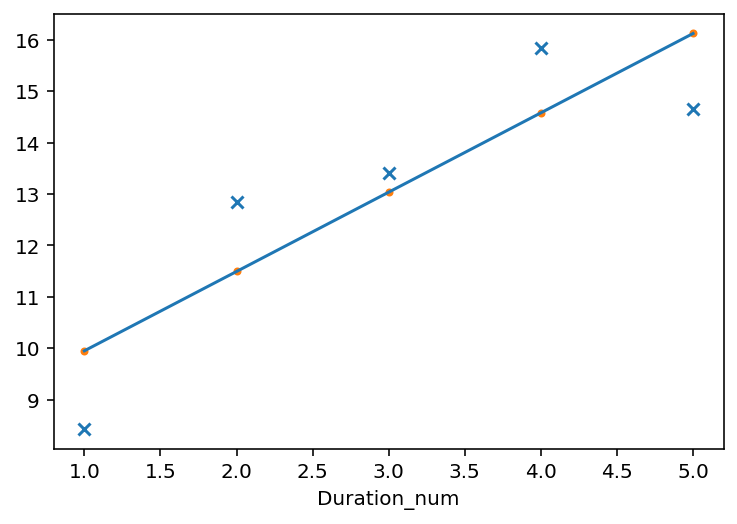

In [21]:
import numpy as np
growth_cc_df = growth_df.copy()
growth_cc_df['Duration_num'] = growth_cc_df.Duration.map({'2012-13':1,'2013-14':2,'2014-15':3,
                                                          '2015-16':4,'2016-17':5})
x=growth_cc_df['Duration_num']
y=growth_cc_df['Andhra Pradesh']
z = np.polyfit(x,y,deg=1) 
p = np.poly1d(z)
plt.scatter(x,y, marker='x')
plt.scatter(x, p(x), marker='.')
sns.lineplot(x,p(x))
plt.show()


# Subplots to show the % Growth of all states in fiscal year

In [22]:
plt.style.use('seaborn-white')
def subplot_barplot(dataframe, list_of_x, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(list_of_x)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists
        sns.barplot(x = dataframe[x_axis], y = dataframe[target], data = dataframe, ax=ax[i])
        ax[i].set_title('% Growth over previous year for State {0}'.format(list_of_x[i]))
        ax[i].set_xlabel('Percentage') 
        ax[i].set_ylabel(target)

#Plots seaborn linelot
plt.style.use('seaborn-white')
def subplot_lineplot(dataframe, nation_df,list_of_x, target):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(list_of_x)/2)) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, len(list_of_x)*3), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    dataframe['Duration_num'] = dataframe[target].map({'2012-13':1,
                                                          '2013-14':2,'2014-15':3,'2015-16':4,'2016-17':5})
    nation_df['Duration_num'] = nation_df[target].map({'2012-13':1,
                                                          '2013-14':2,'2014-15':3,'2015-16':4,'2016-17':5})
    
    df_slope = pd.DataFrame(columns=['State','Slope'])
    for i, x_axis in enumerate(list_of_x): # Gives us an index value to get into all our lists

        # sns.lineplot(x = target, y = x_axis, data = dataframe, ax=ax[i],label='{0} Growth%'.format(list_of_x[i]),markers='+')
        # sns.lineplot(x = 'Duration', y = 'All_India GDP', data = nation_df, ax=ax[i],label='All India Growth%',markers='o')

        x=dataframe['Duration_num']
        y=dataframe[x_axis]#.fillna(0)
        idx = np.isfinite(x) & np.isfinite(y)## this will take care of null values
        m,c = np.polyfit(x[idx], y[idx], 1)
        
        row = [list_of_x[i],m]
        df_slope.loc[i] = row
        
        
        sns.scatterplot(x='Duration_num',y=x_axis,data = dataframe, markers='x',ax=ax[i],
                        label='{0} Growth%'.format(list_of_x[i]))
        sns.lineplot(x,m*x+c,ax=ax[i],label='{0} Growth%'.format(list_of_x[i]),markers='o')
        
        x_nation=nation_df['Duration_num']
        y_nation=nation_df['All_India GDP'].fillna(0)
        m_nation,c_nation = np.polyfit(x_nation,y_nation,deg=1) 
        sns.scatterplot(x='Duration_num',y='All_India GDP',data = nation_df, markers='x',ax=ax[i],
                        label='All India Growth%')
        sns.lineplot(x_nation,m_nation*x_nation+c_nation,ax=ax[i],
                     label='All India Growth%',markers='o')
        
        ax[i].set_title('% Growth over previous year for State {0}'.format(list_of_x[i]),color='blue')
        ax[i].set_ylabel('Percentage') 
        ax[i].set_xlabel(target)
        ax[i].set_xticklabels(size=10, labels=[' ','2012-13',' ','2013-14',' ','2014-15',' ','2015-16',' ',
                                               '2016-17'])
        
    return df_slope                      

# Take subset of dataset excluding 'All_India GDP'

In [23]:
col_list=[col for col in growth_df if col!='All_India GDP']
col_sel_list = [col for col in col_list if col!='Duration']
growth_sel_df = growth_df[col_list]

In [24]:
growth_sel_df

Duration  Andhra Pradesh  Arunachal Pradesh  Assam  Bihar  Chhattisgarh  \
6   2012-13            8.43              13.41   9.56  14.25         12.30   
7   2013-14           12.85              16.38  13.31  12.30         16.44   
8   2014-15           13.40              14.79  11.45  17.92         13.69   
9   2015-16           15.85              12.07  13.19  10.59         10.98   
10  2016-17           14.65                NaN    NaN    NaN         11.26   

      Goa  Gujarat  Haryana  Himachal Pradesh  Jammu & Kashmir  Jharkhand  \
6  -10.02    17.69    16.63             13.89            11.31      15.77   
7   -5.77    11.47    15.45             14.42            10.09       7.92   
8   13.12    10.82     9.18             10.14             4.70      15.14   
9   10.75    11.09    10.91               NaN            17.91      11.44   
10    NaN      NaN    12.82               NaN              NaN        NaN   

    Karnataka  Kerala  Madhya Pradesh  Maharashtra  Manipur  Meghalaya  \
6       14.56   13.26           20.71        13.79     6.45       9.81   
7       18.24   12.79           14.91        13.74    17.83       4.87   
8       12.70   13.11           10.11         8.78    11.39       6.41   
9       11.42   11.85           12.86          NaN      NaN       9.58   
10        NaN     NaN           17.74          NaN      NaN      10.55   

    Mizoram  Nagaland  Odisha  Punjab  Rajasthan  Sikkim  Tamil Nadu  \
6      15.2     15.03   13.34   11.67      13.18   10.51       13.84   
7      23.1     21.98   12.95   12.42      11.27   12.35       13.51   
8      12.3     10.85   10.37    9.95      11.37    9.72       12.51   
9       NaN       NaN    6.19     NaN        NaN    9.39       10.99   
10      NaN       NaN   10.85     NaN        NaN     NaN       10.40   

    Telangana  Tripura  Uttar Pradesh  Uttarakhand  
6       11.70    12.78          13.65        14.12  
7       12.63    18.14          14.73        13.64  
8       13.05    15.92          10.51         8.12  
9       12.61      NaN          10.58        13.65  
10      13.67      NaN            NaN          NaN

# Create dataframe of All India GDP

In [25]:
nation_growth_df=growth_df[['Duration','All_India GDP']]
nation_growth_df

Duration  All_India GDP
6   2012-13          13.86
7   2013-14          12.97
8   2014-15          10.65
9   2015-16           9.99
10  2016-17          11.52

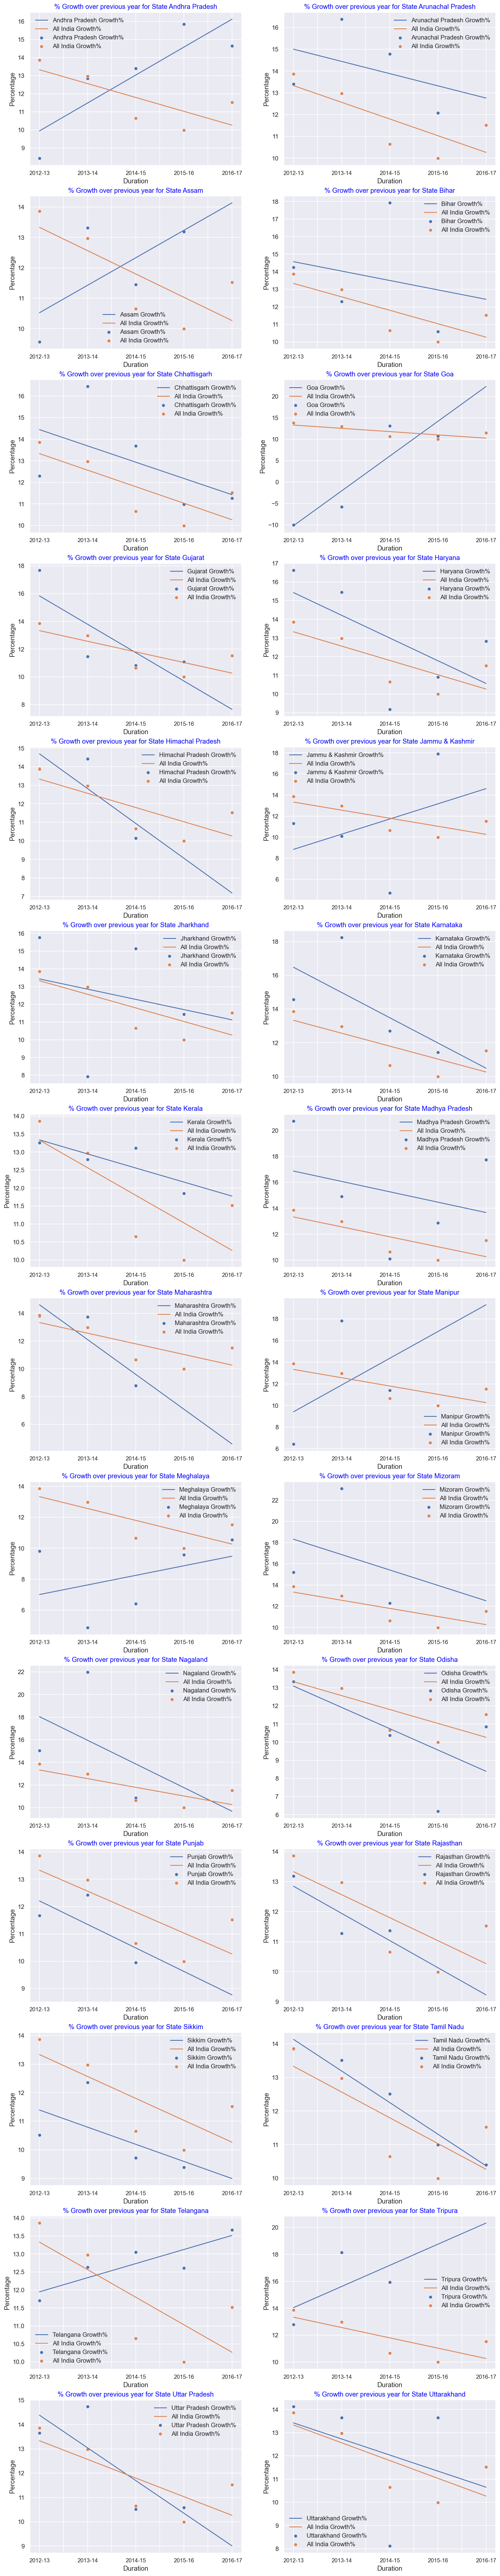

In [26]:
slop_df = subplot_lineplot(growth_sel_df,nation_growth_df, col_sel_list, 'Duration')

In [27]:
slop_df.sort_values(by='Slope',ascending=False)

State  Slope
5                 Goa  8.120
15            Manipur  2.470
25            Tripura  1.570
0      Andhra Pradesh  1.544
9     Jammu & Kashmir  1.441
2               Assam  0.903
16          Meghalaya  0.619
24          Telangana  0.392
12             Kerala -0.391
3               Bihar -0.536
1   Arunachal Pradesh -0.561
10          Jharkhand -0.577
22             Sikkim -0.599
27        Uttarakhand -0.693
4        Chhattisgarh -0.754
13     Madhya Pradesh -0.799
20             Punjab -0.860
21          Rajasthan -0.905
23         Tamil Nadu -0.940
19             Odisha -1.174
7             Haryana -1.216
26      Uttar Pradesh -1.343
17            Mizoram -1.450
11          Karnataka -1.496
8    Himachal Pradesh -1.875
6             Gujarat -2.045
18           Nagaland -2.090
14        Maharashtra -2.505

# Observations from above Plot:

There is a negtaive trend in %growth of GDP of India as can be seen from above plot. The %growth of nation is continuously decreasing from yr 2012-13 till 2016-17

Andhra Pradesh, Assam, Goa, Jammu & Kashmir, Manipur, Telangana, Tripura, Meghalaya states have continuos trend of increase in %growth over previous years.

Out of these Goa has the highest value of positive slope. This means Goa state has continuous trend of increase in %growth of GDP


Goa, Manipur, Tripura have the highest trend of continous increase in %growth of state GDP

Despite India’s average growth being negative, the above states have been growing at an unprecedented range. This could be possible due to multiple factors – low base, non-dependence on external factors etc.

Maharashtra, Nagaland, Gujarat are the 3 states with continuous low performing trend wrt %growth of state GDP

India’s one of largest state Maharashtra has been de-growing more than India’s national average. Other states like Gujarat, Karnataka are also showing negative growth. Mizoram has been de-growing but still not at par with national average (perhaps base effect)

# Lets plot the average %growth rate across all states and India(as a nation).


Years considered are fiscal year 2012-13, 2013-14, 2014-15, 2015-16, 2016-17

# Transpose growth dataframe

In [28]:
growth_transpose_df= growth_df.T
growth_transpose_df.rename(columns={6:'2012-13',
                                    7:'2013-14',8:'2014-15',9:'2015-16',10:'2016-17'},inplace=True)
growth_transpose_df = growth_transpose_df[1:]
growth_transpose_df


2012-13 2013-14 2014-15 2015-16 2016-17
Andhra Pradesh       8.43   12.85    13.4   15.85   14.65
Arunachal Pradesh   13.41   16.38   14.79   12.07     NaN
Assam                9.56   13.31   11.45   13.19     NaN
Bihar               14.25    12.3   17.92   10.59     NaN
Chhattisgarh         12.3   16.44   13.69   10.98   11.26
Goa                -10.02   -5.77   13.12   10.75     NaN
Gujarat             17.69   11.47   10.82   11.09     NaN
Haryana             16.63   15.45    9.18   10.91   12.82
Himachal Pradesh    13.89   14.42   10.14     NaN     NaN
Jammu & Kashmir     11.31   10.09     4.7   17.91     NaN
Jharkhand           15.77    7.92   15.14   11.44     NaN
Karnataka           14.56   18.24    12.7   11.42     NaN
Kerala              13.26   12.79   13.11   11.85     NaN
Madhya Pradesh      20.71   14.91   10.11   12.86   17.74
Maharashtra         13.79   13.74    8.78     NaN     NaN
Manipur              6.45   17.83   11.39     NaN     NaN
Meghalaya            9.81    4.87    6.41    9.58   10.55
Mizoram              15.2    23.1    12.3     NaN     NaN
Nagaland            15.03   21.98   10.85     NaN     NaN
Odisha              13.34   12.95   10.37    6.19   10.85
Punjab              11.67   12.42    9.95     NaN     NaN
Rajasthan           13.18   11.27   11.37     NaN     NaN
Sikkim              10.51   12.35    9.72    9.39     NaN
Tamil Nadu          13.84   13.51   12.51   10.99    10.4
Telangana            11.7   12.63   13.05   12.61   13.67
Tripura             12.78   18.14   15.92     NaN     NaN
Uttar Pradesh       13.65   14.73   10.51   10.58     NaN
Uttarakhand         14.12   13.64    8.12   13.65     NaN
All_India GDP       13.86   12.97   10.65    9.99   11.52

# Take average of growth for all years across different states

In [29]:
growth_transpose_df['Average_Growth'] = round(growth_transpose_df.mean(axis=1),2)
growth_transpose_df.sort_values(by='Average_Growth',ascending=False)

2012-13 2013-14 2014-15 2015-16 2016-17  Average_Growth
Mizoram              15.2    23.1    12.3     NaN     NaN           16.87
Nagaland            15.03   21.98   10.85     NaN     NaN           15.95
Tripura             12.78   18.14   15.92     NaN     NaN           15.61
Madhya Pradesh      20.71   14.91   10.11   12.86   17.74           15.27
Karnataka           14.56   18.24    12.7   11.42     NaN           14.23
Arunachal Pradesh   13.41   16.38   14.79   12.07     NaN           14.16
Bihar               14.25    12.3   17.92   10.59     NaN           13.76
Andhra Pradesh       8.43   12.85    13.4   15.85   14.65           13.04
Haryana             16.63   15.45    9.18   10.91   12.82           13.00
Chhattisgarh         12.3   16.44   13.69   10.98   11.26           12.93
Himachal Pradesh    13.89   14.42   10.14     NaN     NaN           12.82
Gujarat             17.69   11.47   10.82   11.09     NaN           12.77
Kerala              13.26   12.79   13.11   11.85     NaN           12.75
Telangana            11.7   12.63   13.05   12.61   13.67           12.73
Jharkhand           15.77    7.92   15.14   11.44     NaN           12.57
Uttarakhand         14.12   13.64    8.12   13.65     NaN           12.38
Uttar Pradesh       13.65   14.73   10.51   10.58     NaN           12.37
Tamil Nadu          13.84   13.51   12.51   10.99    10.4           12.25
Maharashtra         13.79   13.74    8.78     NaN     NaN           12.10
Rajasthan           13.18   11.27   11.37     NaN     NaN           11.94
Manipur              6.45   17.83   11.39     NaN     NaN           11.89
Assam                9.56   13.31   11.45   13.19     NaN           11.88
All_India GDP       13.86   12.97   10.65    9.99   11.52           11.80
Punjab              11.67   12.42    9.95     NaN     NaN           11.35
Jammu & Kashmir     11.31   10.09     4.7   17.91     NaN           11.00
Odisha              13.34   12.95   10.37    6.19   10.85           10.74
Sikkim              10.51   12.35    9.72    9.39     NaN           10.49
Meghalaya            9.81    4.87    6.41    9.58   10.55            8.24
Goa                -10.02   -5.77   13.12   10.75     NaN            2.02

# Plot a graph for rows " % Growth over previous year" for all the states (not union territories)

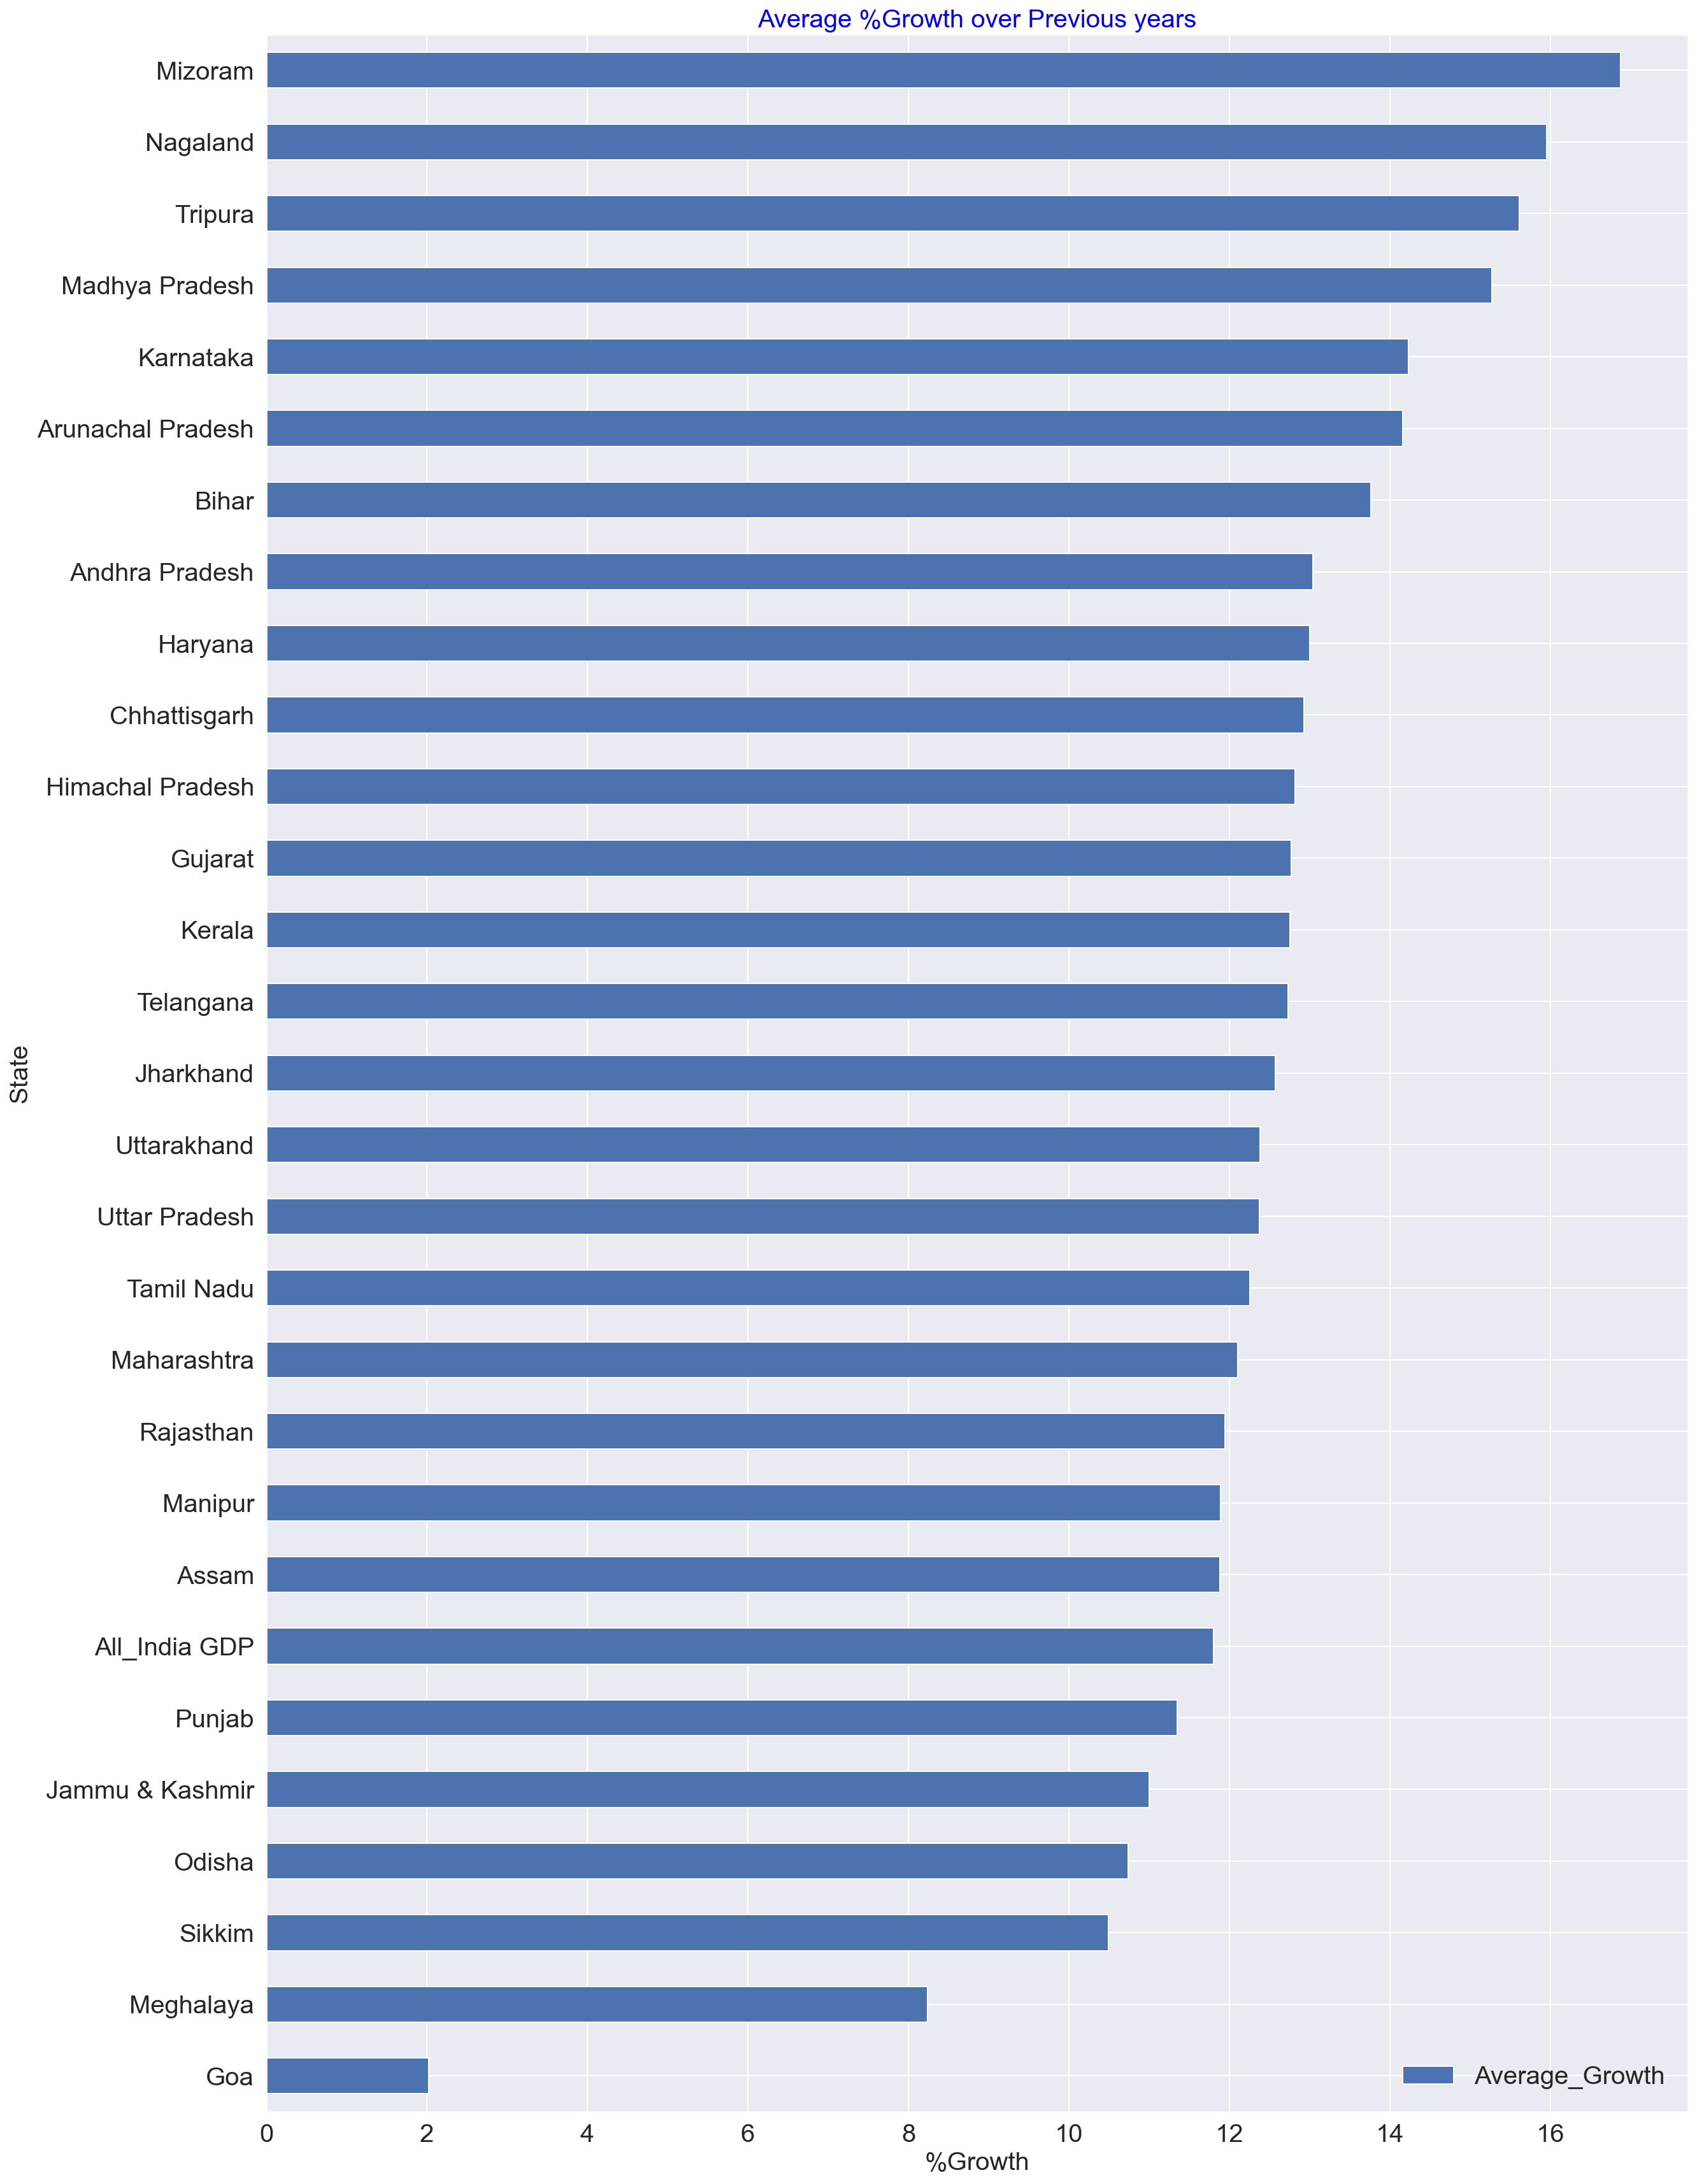

In [31]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
growth_transpose_df['Average_Growth'].sort_values(ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('Average %Growth over Previous years',color='blue')
plt.ylabel('State')
plt.xlabel('%Growth');
plt.legend();


# Observatiosn from Average Growth Percentage over previous years:

Please note that data of growth percentage is missing for State of Mizoram, Nagaland and Tripura, Himachal Pradesh, Maharasthra, Rajasthan, Manipur, Punjab for year 2015-16.

With the data provided,

State of Mizoram(16.87%) has highest average growth percentage rate over previous years followed by Nagaland(15.95%), Tripura(15.61%)

State of Goa(2.02%) has the lowest average growth percentage followed by Meghalaya(8.24%) second lowest and Sikkim(10.49%) third lowest in average growth percentage over previous years

All India GDP average growth rate is 11.87%

Average Growth Rate of my home state Haryana(13.0%) is more than All India GDP average growth rate. There was a sudden decrease in growth rate from 15.45% in 2013-14 to 9.18% in 2014-15. But after that there has been increase in growth rate with 10.91% in 2015-16 to 12.82% in 2016-17. This has resulted in average growth rate of 13% and is ranked as 9th highest in average growth Percentage over previous years

# Plot the total GDP of the states for the year 2015-16


Lets look at dataframe of GSDP

In [33]:
gsdp_df

Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
0  2011-12        379402.0            11063.0  143175.0  247144.0   
1  2012-13        411404.0            12547.0  156864.0  282368.0   
2  2013-14        464272.0            14602.0  177745.0  317101.0   
3  2014-15        526468.0            16761.0  198098.0  373920.0   
4  2015-16        609934.0            18784.0  224234.0  413503.0   
5  2016-17        699307.0                NaN       NaN       NaN   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
0      158074.0  42367.0  615606.0  297539.0           72720.0   
1      177511.0  38120.0  724495.0  347032.0           82820.0   
2      206690.0  35921.0  807623.0  400662.0           94764.0   
3      234982.0  40633.0  895027.0  437462.0          104369.0   
4      260776.0  45002.0  994316.0  485184.0               NaN   
5      290140.0      NaN       NaN  547396.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
0          78254.0   150918.0   603778.0  364048.0        315561.0   
1          87105.0   174724.0   691700.0  412313.0        380924.0   
2          95893.0   188567.0   817886.0  465041.0        437737.0   
3         100404.0   217107.0   921788.0  526002.0        481982.0   
4         118387.0   241955.0  1027068.0  588337.0        543975.0   
5              NaN        NaN        NaN       NaN        640484.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha    Punjab  \
0    1272967.0  12915.0    19918.0   7259.0   11839.0  227872.0  266628.0   
1    1448466.0  13748.0    21872.0   8362.0   13619.0  258275.0  297734.0   
2    1647506.0  16198.0    22938.0  10293.0   16612.0  291709.0  334714.0   
3    1792122.0  18043.0    24408.0  11559.0   18414.0  321971.0  368011.0   
4          NaN      NaN    26745.0      NaN       NaN  341887.0       NaN   
5          NaN      NaN    29567.0      NaN       NaN  378991.0       NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
0   436465.0  11165.0    751485.0   359433.0  19208.0       724049.0   
1   494004.0  12338.0    855481.0   401493.0  21663.0       822903.0   
2   549701.0  13862.0    971090.0   452186.0  25593.0       944146.0   
3   612194.0  15209.0   1092564.0   511178.0  29667.0      1043371.0   
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   
5        NaN      NaN   1338766.0   654294.0      NaN            NaN   

   Uttarakhand  All_India GDP  
0     115523.0      8736039.0  
1     131835.0      9946636.0  
2     149817.0     11236635.0  
3     161985.0     12433749.0  
4     184091.0     13675331.0  
5          NaN     15251028.0

Filter out the rows with duration 2015-16

In [34]:
gsdp_copy_df=gsdp_df.copy()
gsdp_copy_df=gsdp_copy_df[gsdp_copy_df['Duration']=='2015-16']
gsdp_copy_df

Duration  Andhra Pradesh  Arunachal Pradesh     Assam     Bihar  \
4  2015-16        609934.0            18784.0  224234.0  413503.0   

   Chhattisgarh      Goa   Gujarat   Haryana  Himachal Pradesh  \
4      260776.0  45002.0  994316.0  485184.0               NaN   

   Jammu & Kashmir  Jharkhand  Karnataka    Kerala  Madhya Pradesh  \
4         118387.0   241955.0  1027068.0  588337.0        543975.0   

   Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland    Odisha  Punjab  \
4          NaN      NaN    26745.0      NaN       NaN  341887.0     NaN   

   Rajasthan   Sikkim  Tamil Nadu  Telangana  Tripura  Uttar Pradesh  \
4        NaN  16637.0   1212668.0   575631.0      NaN      1153795.0   

   Uttarakhand  All_India GDP  
4     184091.0     13675331.0

Transpose growth data frame



In [35]:
gsdp_transpose_df = gsdp_copy_df.T
gsdp_transpose_df.rename(columns={4:'2015-16'},inplace=True)
gsdp_transpose_df = gsdp_transpose_df[1:].sort_values(by='2015-16',ascending=False)
gsdp_transpose_df


2015-16
All_India GDP      13675331.0
Tamil Nadu          1212668.0
Uttar Pradesh       1153795.0
Karnataka           1027068.0
Gujarat              994316.0
Andhra Pradesh       609934.0
Kerala               588337.0
Telangana            575631.0
Madhya Pradesh       543975.0
Haryana              485184.0
Bihar                413503.0
Odisha               341887.0
Chhattisgarh         260776.0
Jharkhand            241955.0
Assam                224234.0
Uttarakhand          184091.0
Jammu & Kashmir      118387.0
Goa                   45002.0
Meghalaya             26745.0
Arunachal Pradesh     18784.0
Sikkim                16637.0
Himachal Pradesh          NaN
Maharashtra               NaN
Manipur                   NaN
Mizoram                   NaN
Nagaland                  NaN
Punjab                    NaN
Rajasthan                 NaN
Tripura                   NaN

# Plot GSDP for all states


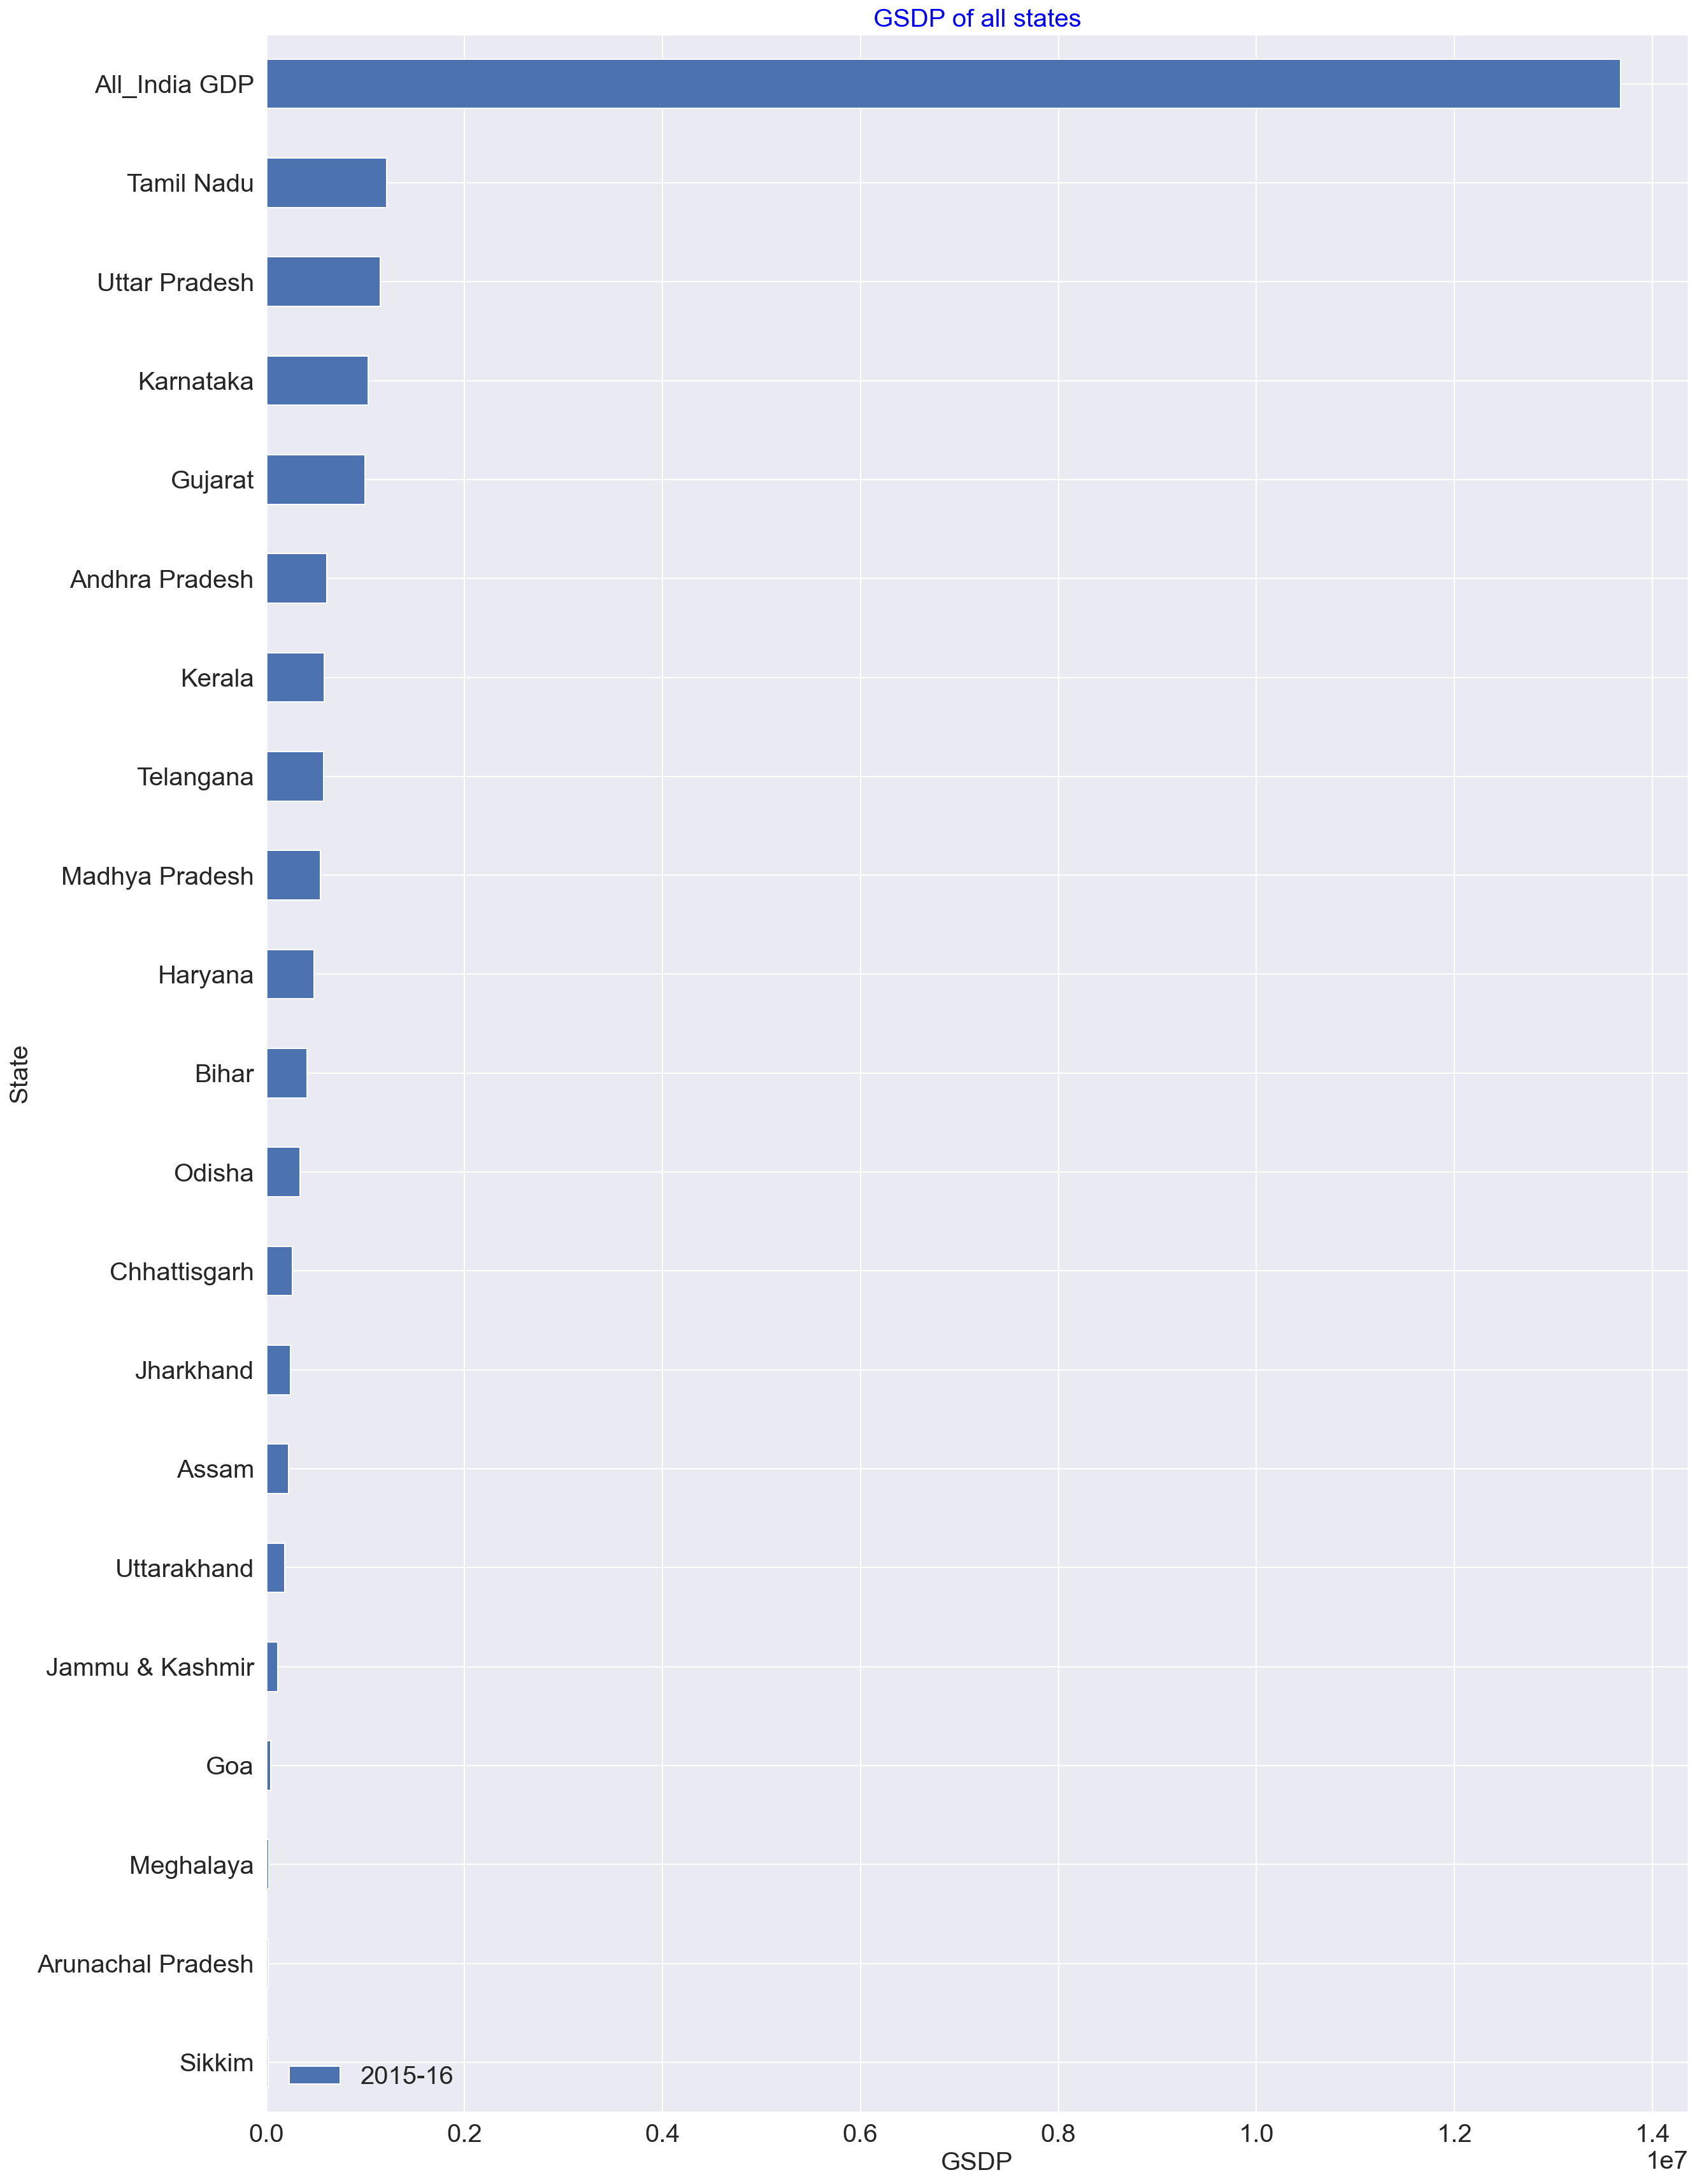

In [36]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df.dropna().sort_values(by='2015-16',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');

# Above plot has GSDP of All India as nation as well. Ignoring that entry from the dataframe and plotting again to get clear picture of GSDP of all states

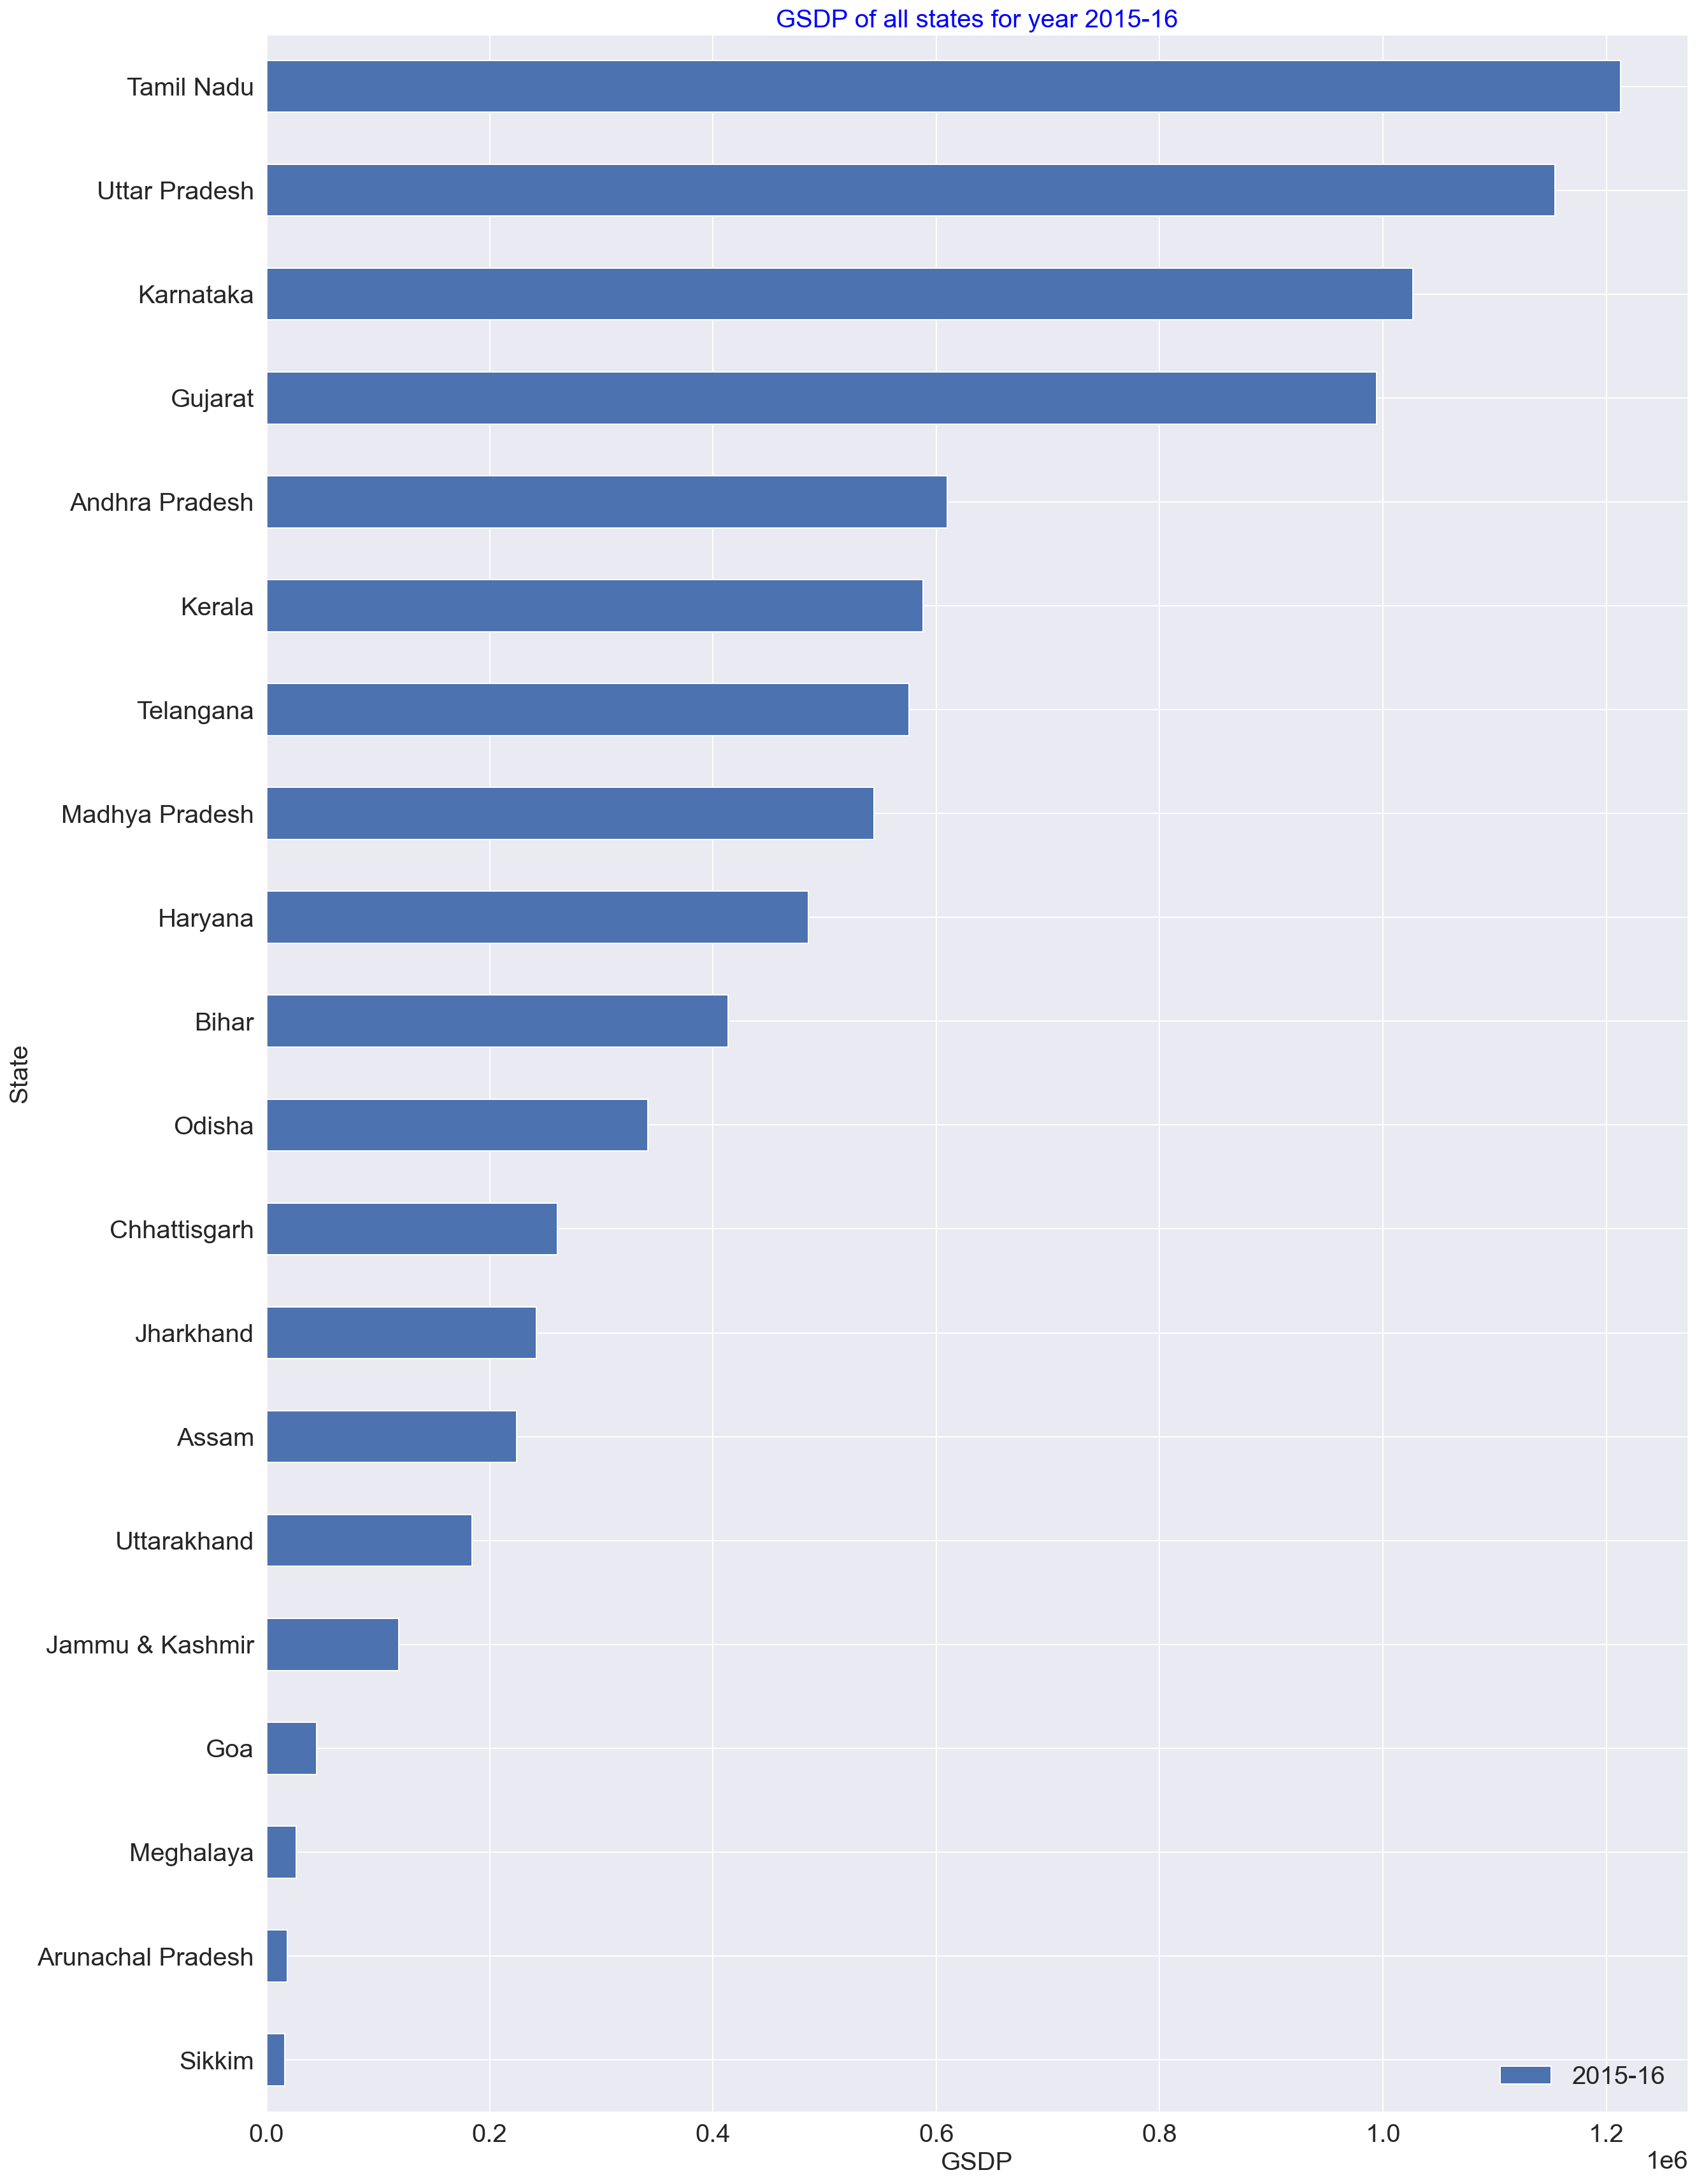

In [38]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df[1:].dropna().sort_values(by='2015-16',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states for year 2015-16',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');

# Observations from above Plot


For the year of 2015-16:

GSDP of state Tamil Nadu(1212668.0) is highest followed by Uttar Pradesh(1153795.0) and then Karnataka(1027068.0)

GSDP of state Sikkim(16637) is the lowest followed by Arunachal Pradesh(18784) as 2nd lowest and Meghalaya(26745) as 3rd lowest

Government needs to focus on increasing GSDP of these lowest ranking states. Measure for growth improvement needs to be brought in for these states

# Extra Plotting - GSDP for year 2014-15 for presentation purposes

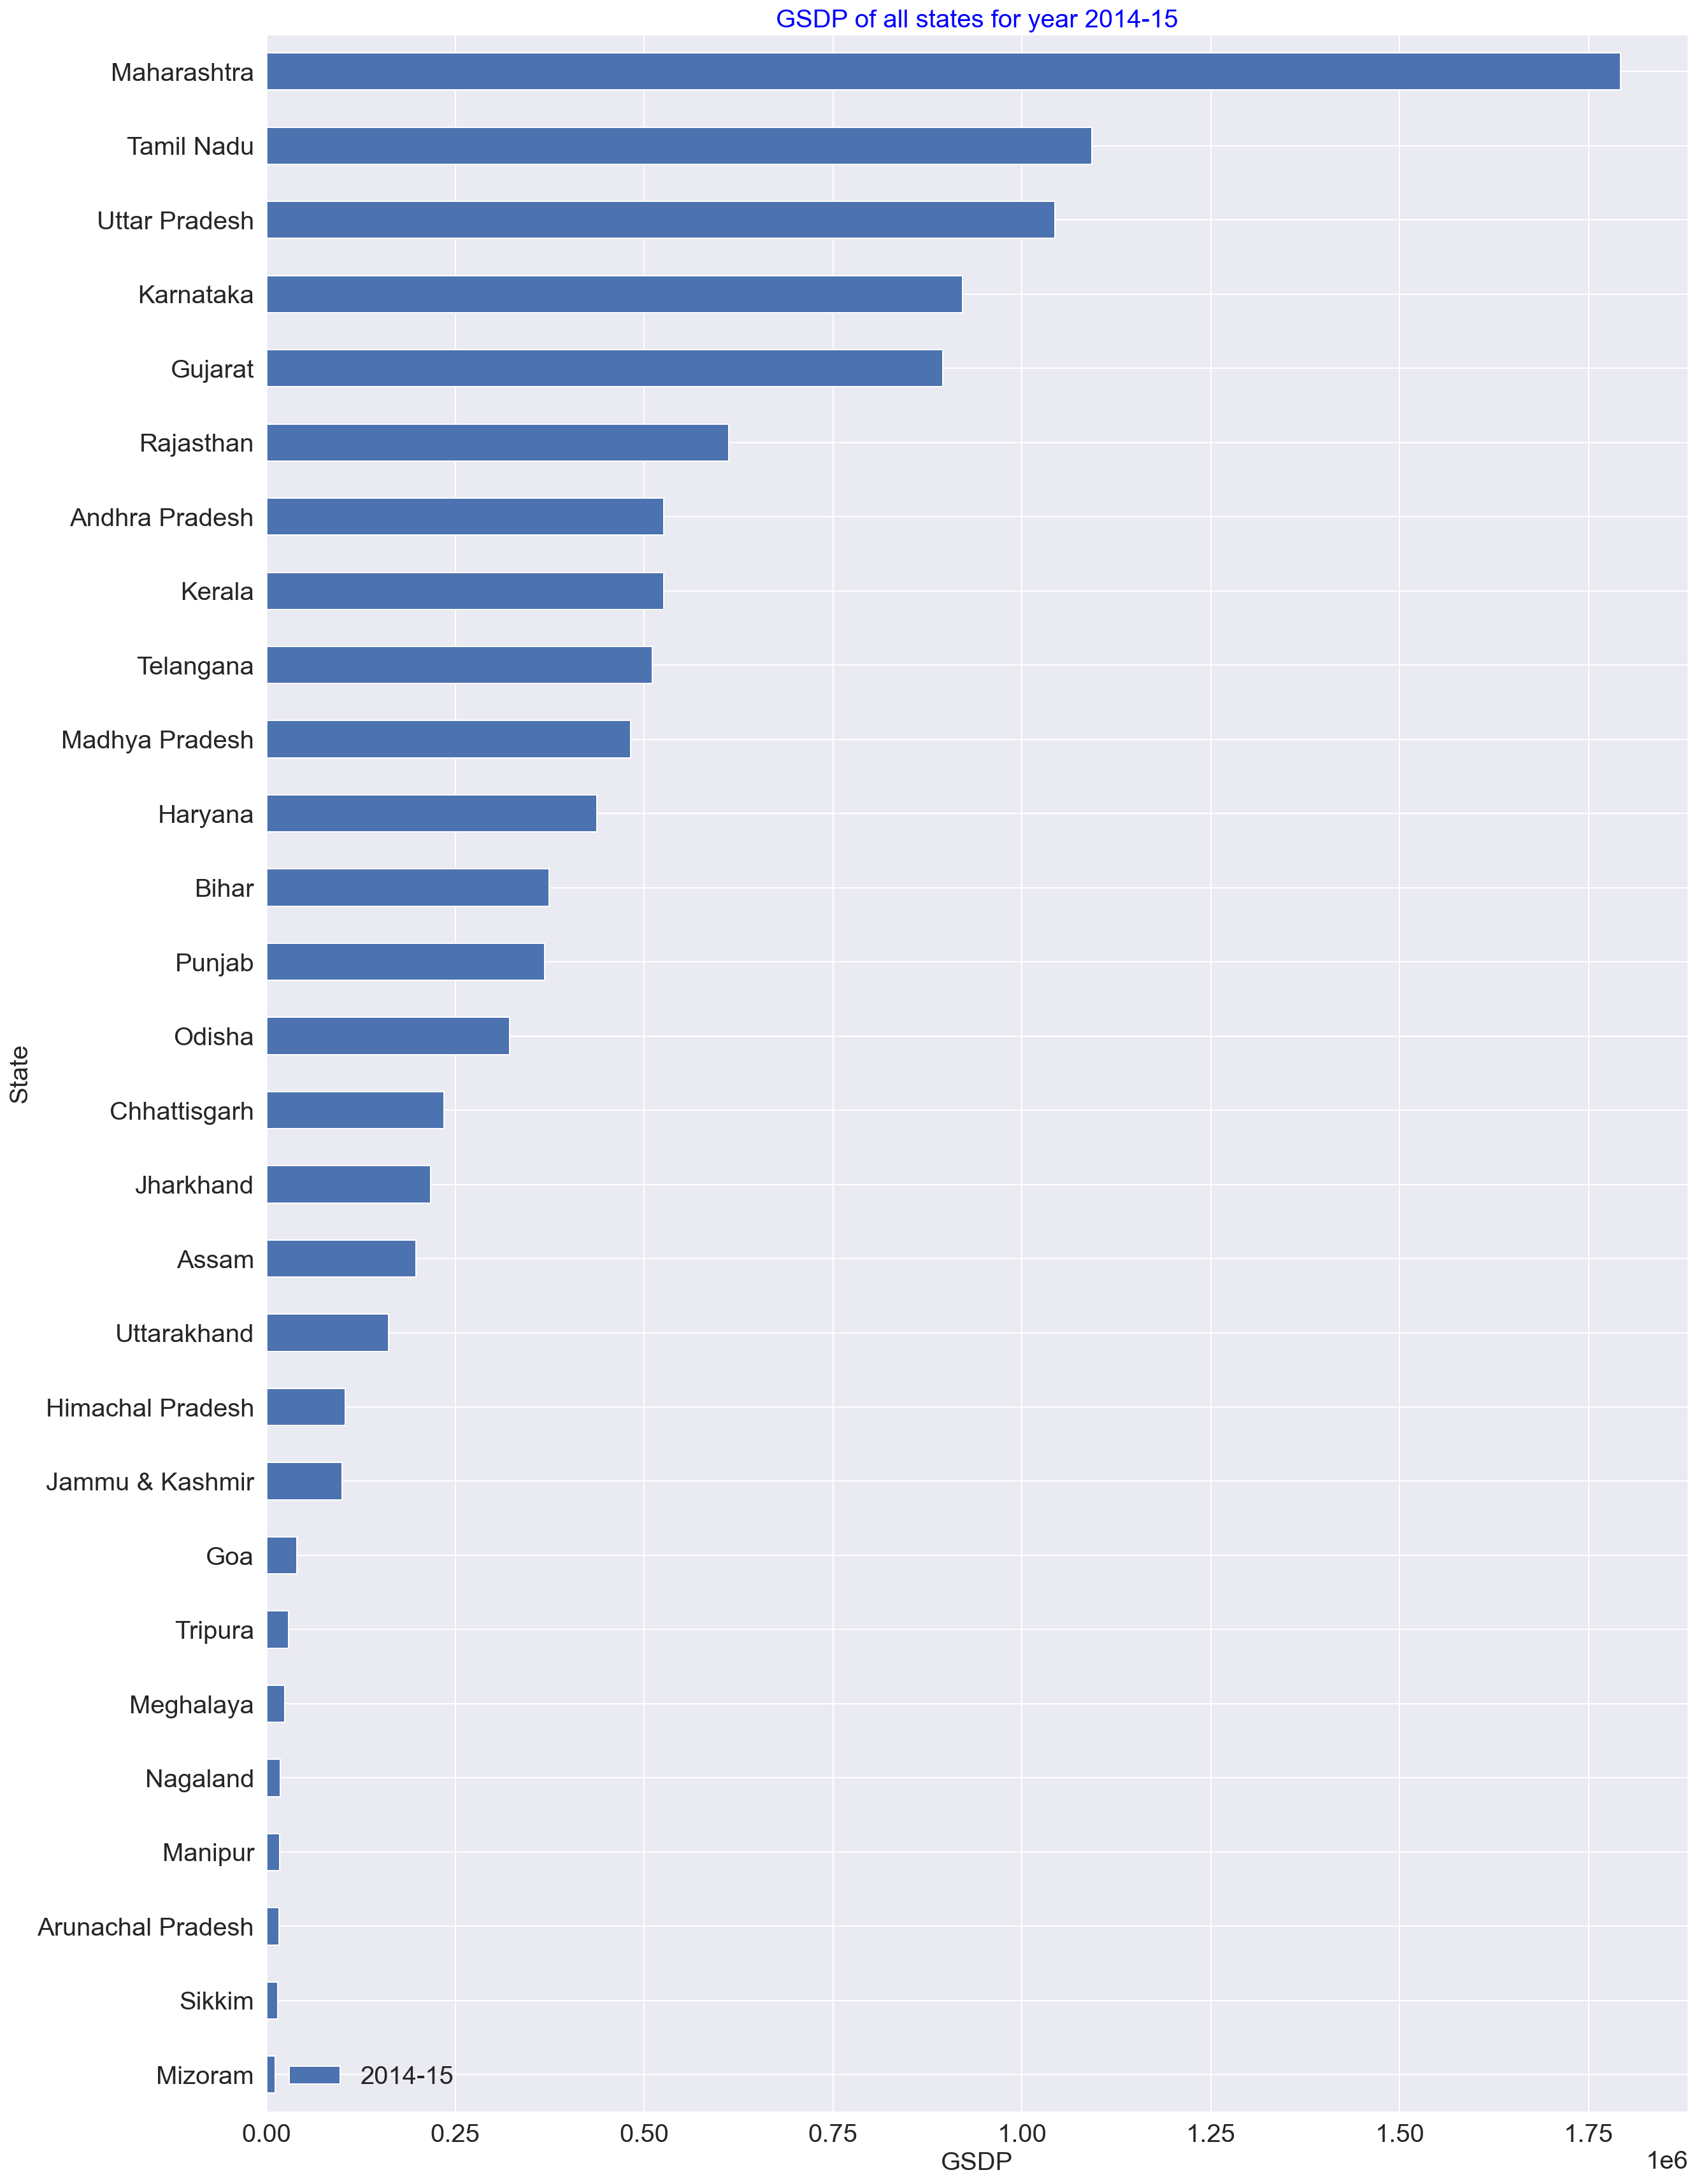

In [39]:
gsdp_copy_df1=gsdp_df.copy()
gsdp_copy_df1=gsdp_copy_df1[gsdp_copy_df1['Duration']=='2014-15']
gsdp_transpose_df1 = gsdp_copy_df1.T
gsdp_transpose_df1.rename(columns={3:'2014-15'},inplace=True)
gsdp_transpose_df1 = gsdp_transpose_df1[1:].sort_values(by='2014-15',ascending=False)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
gsdp_transpose_df1[1:].dropna().sort_values(by='2014-15',ascending=True).plot(kind='barh',
          figsize=(20,30));
plt.title('GSDP of all states for year 2014-15',color='blue')
plt.ylabel('State')
plt.xlabel('GSDP');

# Observations from above Plot

For the year of 2014-15:

GSDP of state Maharashtra(1792122.0) is highest followed by Tamil Nadu(1092564.0) and then Uttar Pradesh(1043371.0)

GSDP of state Mizoram (11559.0) is the lowest followed by Sikkim(15209.0) as 2nd lowest and Arunachal Pradesh(16761.0) as 3rd lowest

Government needs to focus on increasing GSDP of these lowest ranking states. Measure for growth improvement needs to be brought in for these states

# Part I-B

# Load all Files

In [40]:
path = './Downloads/states/*.csv'

all_files = glob.glob(path)
files_list=[]
AllStates_datacheck = pd.DataFrame(index=['Missingness','Duplicates'])
States_data_list = []
for filename in all_files:
    ##find the state name from the file name using split function
    state = filename.split('/')[-1].split('_cur')[0].split('-')[1]
    state_df = pd.read_csv(filename,index_col=None,header=0,encoding = 'unicode_escape')
    
    ## As per the given instructions - for Part - IB - Also, perform the analysis only for the duration 2014-15. 
    state_df = state_df[['S.No.','Item','2014-15']]
    
    # As per the assignment - percentage contribution of the primary, secondary and tertiary sectors 
    ## as a percentage of the total GDP for all the states.
    ## based on this drop the sub-sub sectors
    
    state_df.drop(state_df.loc[state_df['S.No.'].isin(['1.1','1.2','1.3','1.4','6.1','6.2',
                                                   '7.1','7.2','7.3','7.4','7.5','7.6','7.7'])].index,inplace=True)
    
    
    ## with given formula to calculate Total GDP of State
    ## Total GSVA = (Primary + Secondary + Tertiary) contributions
    ## GSDP = Total GSVA + Taxes on Products - Subsidies on Products
    ## Since these columns - Total GSVA, Taxes on Product, Subsidies might be needed for ananlysis later
    ## so still keeping these columns in dataframe
    #ignore --> state_df.drop(state_df.loc[state_df['S.No.'].isin(['12','13','14','16'])].index,inplace=True)

    
    ##Transpose the DataFrame
    state_df = state_df.T
    
    ##take the row at index location1 and save it in header variable
    new_header = state_df.iloc[1]
    
    ## select only the row with only relevant values by removing unwanted rows like S.No. etc
    state_df = state_df[2:]
    
    ## set the columns of this dataframe using the header variable
    state_df.columns = new_header
    
    ## Add new column as state name in dataframe
    state_df['State'] = state
    
    ##reshuffle columns and bring State column in front
    col_list = list(state_df.columns)
    col_list = col_list[-1:] + col_list[:-1]
    
    state_df = state_df[col_list]
    
    ## Append the state's dataframe in the list
    States_data_list.append(state_df)

    ## This piece of code will check for missingness and duplicates in each state dataframe
    AllStates_datacheck[state]=[state_df.isnull().sum().sum(),state_df.duplicated().sum()]


## When all files are read and the data is available in final list
## then load that list in dataframe using concatenate function of pandas
all_states_df = pd.concat(States_data_list,axis=0,ignore_index=True)
all_states_df
    

Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
4            Chandigarh                             16233   
5          Chhattisgarh                           3948847   
6                 Delhi                            250568   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
22           Puducherry                            113156   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
4                     179       16412        149631   
5                 2451970     6400817       4370593   
6                  963777     1214345       2749307   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
22                  33272      146428        618297   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587

# Check for missing and duplicate value corresponding to each state


In [41]:
AllStates_datacheck


Andhra_Pradesh  Arunachal_Pradesh  Assam  Bihar  Chandigarh  \
Missingness               0                  0      0      0           0   
Duplicates                0                  0      0      0           0   

             Chhattisgarh  Delhi  Goa  Gujarat  Haryana  Himachal_Pradesh  \
Missingness             0      0    0        0        0                 0   
Duplicates              0      0    0        0        0                 0   

             Jammu_Kashmir  Jharkhand  Karnataka  Kerala  Madhya_Pradesh  \
Missingness              0          0          0       0               0   
Duplicates               0          0          0       0               0   

             Maharashtra  Manipur  Meghalaya  Mizoram  Nagaland  Odisha  \
Missingness            0        1          0        0         0       0   
Duplicates             0        0          0        0         0       0   

             Puducherry  Punjab  Rajasthan  Sikkim  Tamil_Nadu  Telangana  \
Missingness           0       0          0       0           0          0   
Duplicates            0       0          0       0           0          0   

             Tripura  Uttarakhand  Uttar_Pradesh  
Missingness        0            0              0  
Duplicates         0            0              0

Above cell shows that only Manipur State has 1 missing value

# In above dataframe it can be seen that there are rows for Union Territoy as well


Drop the Union Territory rows

In [42]:
### Drop UTs from the dataset
print('No of rows {0} and columns {1} before dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))
all_states_df.drop(all_states_df.loc[all_states_df['State'].isin(
    ['Delhi','Chandigarh','Puducherry'])].index,inplace=True)
print('No of rows {0} and columns {1} after dropping UTs'.format(all_states_df.shape[0],all_states_df.shape[1]))

No of rows 31 and columns 21 before dropping UTs
No of rows 28 and columns 21 after dropping UTs


# Sort by 'Per Capita GSDP (Rs.)' to see the top performing state

In [43]:
all_states_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item              State Agriculture, forestry and fishing  \
7                   Goa                            308507   
25               Sikkim                            137447   
9               Haryana                         8015238.0   
14               Kerala                           5930617   
29          Uttarakhand                         1601423.0   
16          Maharashtra                          16475655   
10     Himachal_Pradesh                           1514981   
26           Tamil_Nadu                          13064238   
13            Karnataka                          11219422   
8               Gujarat                        13769969.0   
27            Telangana                           7591501   
23               Punjab                           9285716   
1     Arunachal_Pradesh                            686117   
0        Andhra_Pradesh                          14819416   
19              Mizoram                            217010   
20             Nagaland                            607897   
5          Chhattisgarh                           3948847   
24            Rajasthan                          15044394   
28              Tripura                          799825.0   
18            Meghalaya                          366521.0   
11        Jammu_Kashmir                           1586705   
21               Odisha                           6422978   
15       Madhya_Pradesh                          16235647   
12            Jharkhand                           3211065   
2                 Assam                           3855548   
17              Manipur                          383140.0   
30        Uttar_Pradesh                          25097754   
3                 Bihar                           7951890   

Item Mining and quarrying     Primary Manufacturing  \
7                    3622      312129       1177608   
25                   1329      138776        550697   
9                 25186.0   8040424.0     7756921.0   
14                 558824     6489442       4273567   
29               244549.0   1845972.0     5866252.0   
16                5282727    21758383      33660294   
10                  33385     1548366       2543637   
26                 265536    13329774      18914794   
13                 846882    12066304      12953843   
8               2117218.0  15887187.0    24087538.0   
27                1541853     9133354       6353711   
23                  10354     9296070       4790341   
1                   30842      716959         26120   
0                 1484300    16303716       4672266   
19                   8588      225598          8479   
20                   8280      616178         18346   
5                 2451970     6400817       4370593   
24                4069385    19113780       6552580   
28               142391.0    942216.0      228625.0   
18                84529.0    451050.0      433213.0   
11                  33621     1620326        893207   
21                2586328     9009306       5754229   
15                1618373    17854020       4368833   
12                2037289     5248354       4114148   
2                 1471149     5326697       2002936   
17                    NaN    383140.0       49501.0   
30                 901501    25999255      12261649   
3                   68107     8019997       2189965   

Item Electricity, gas, water supply & other utility services Construction  \
7                                                204110            165819   
25                                               212499             82058   
9                                             1101919.0         3702571.0   
14                                               482470           7314003   
29                                             433880.0         1342733.0   
16                                              4334702           9450211   
10                                               767268            808256   
26                

# Plot GDP per Capita for all States


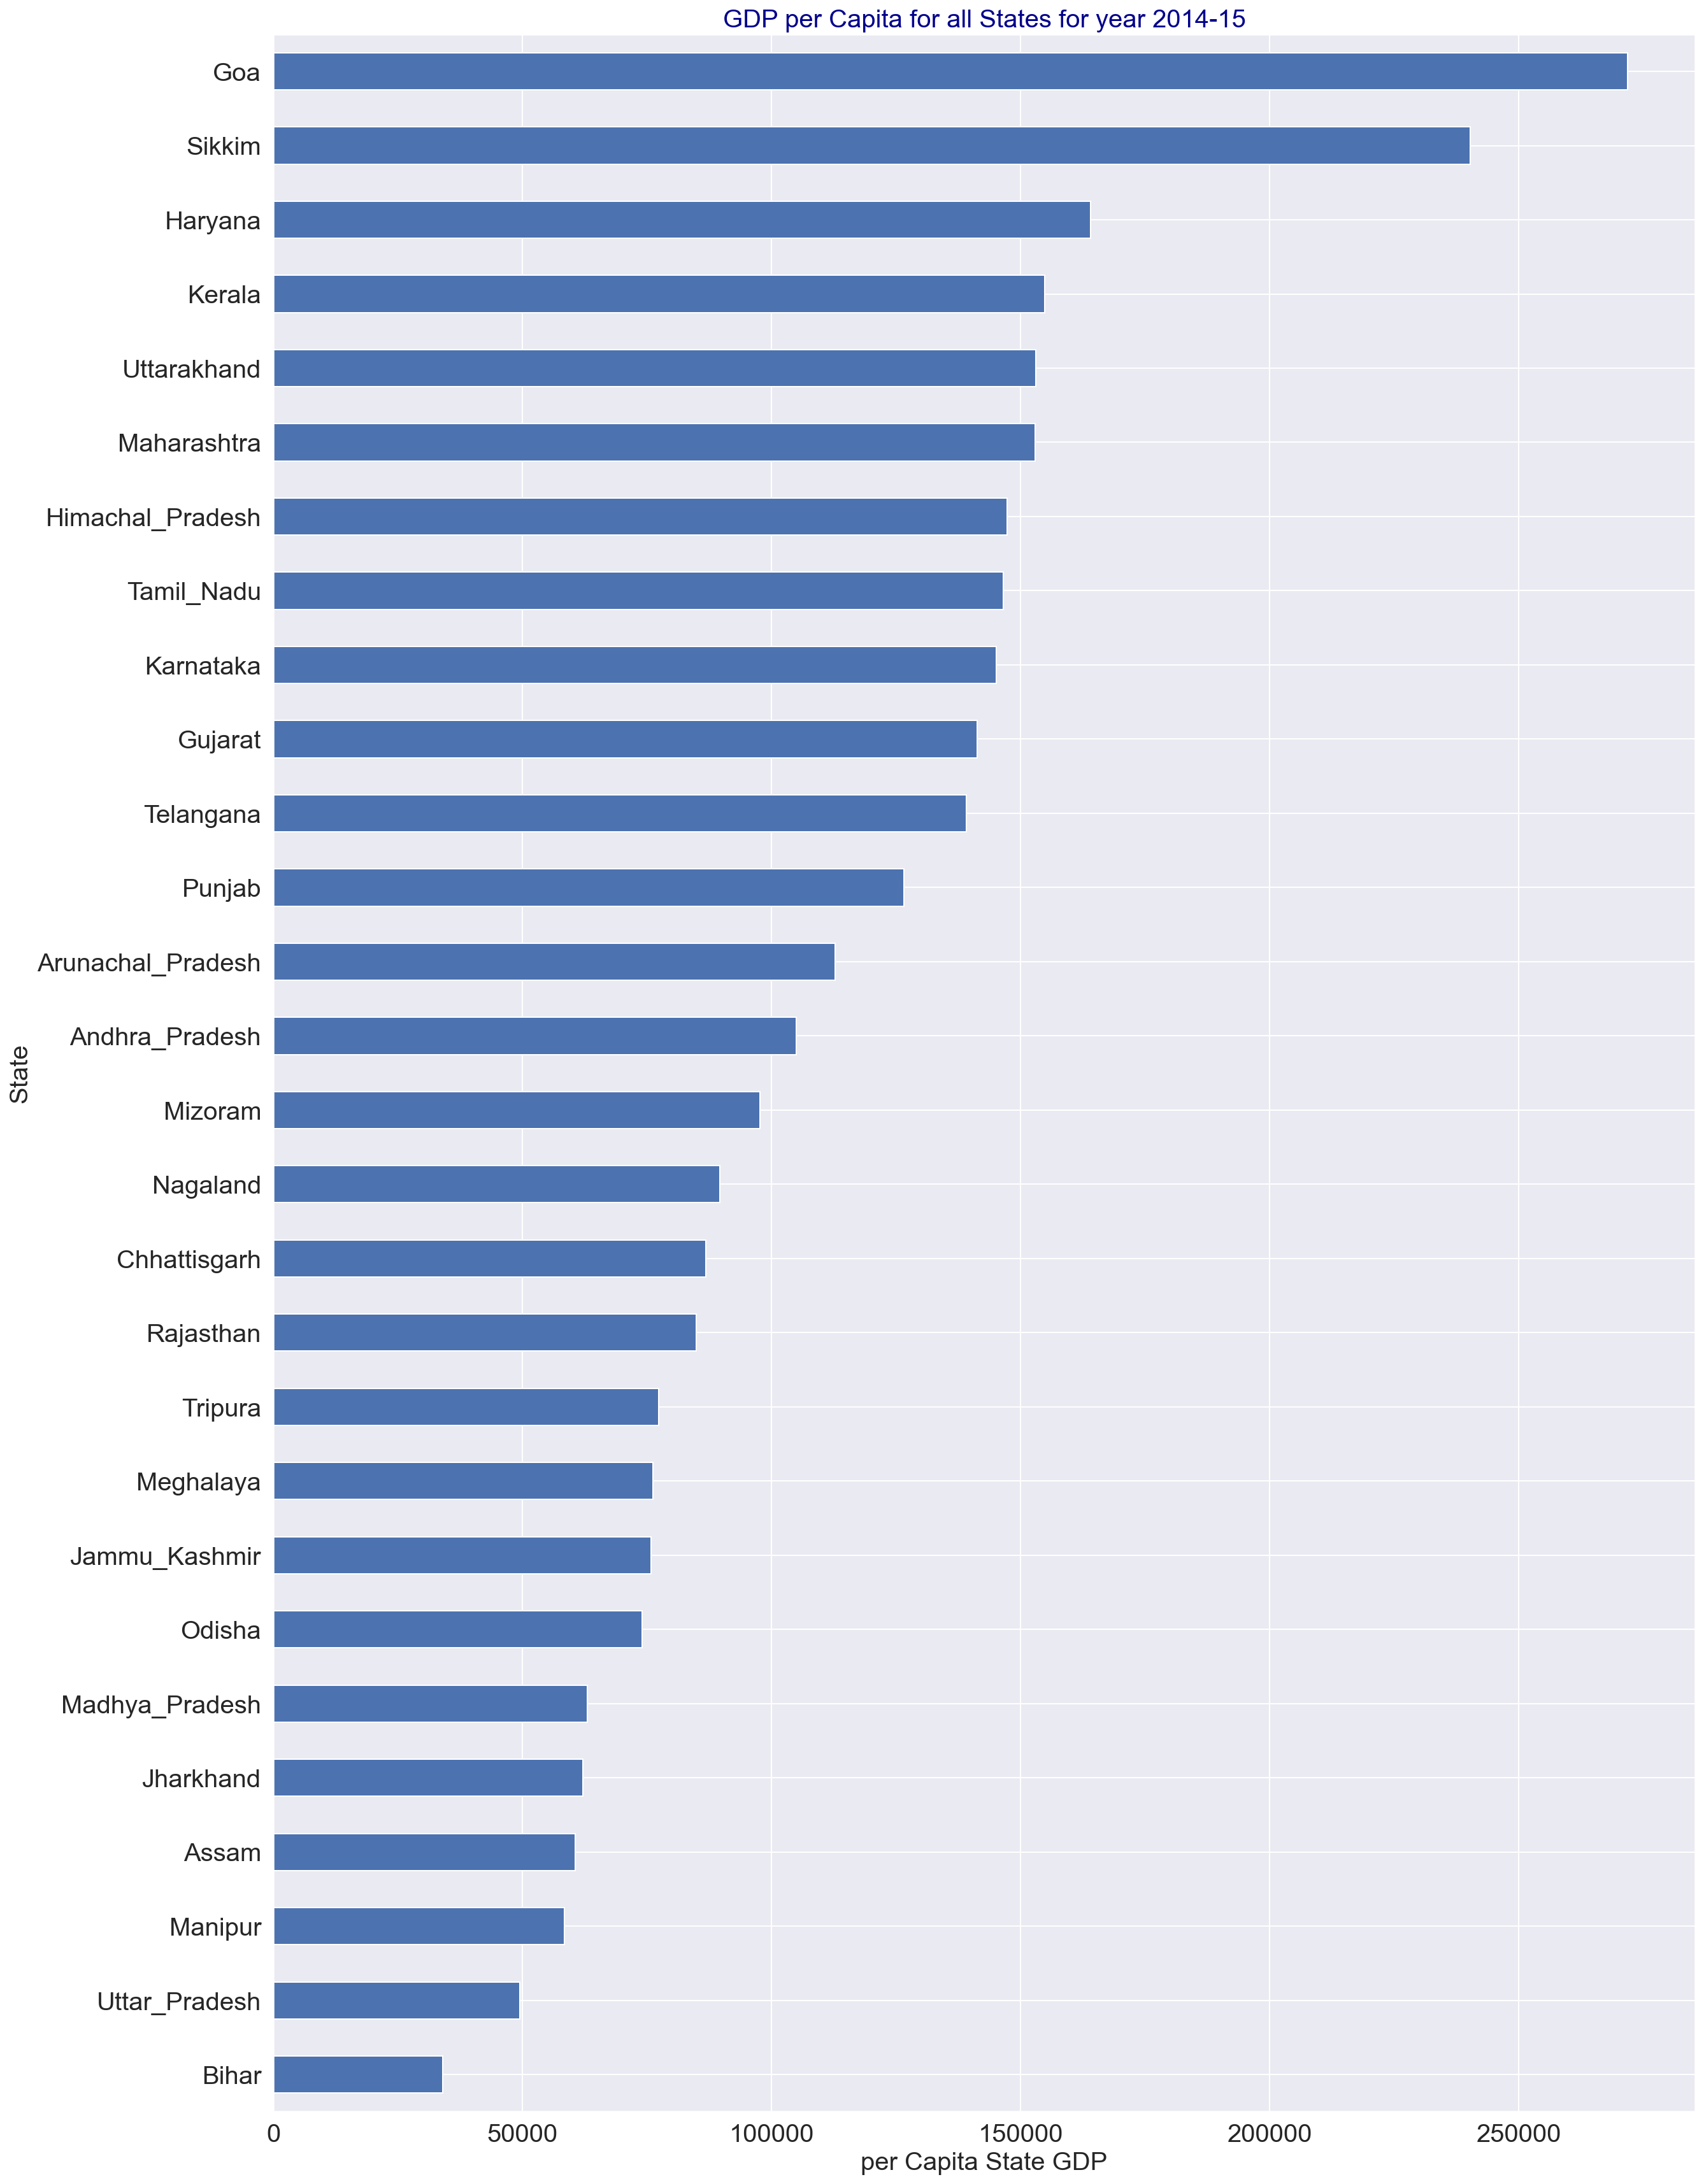

In [44]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.title('GDP per Capita for all States for year 2014-15',color='darkblue')
plt.xlabel('per Capita State GDP')
plt.ylabel('State')
all_states_df.set_index('State')['Per Capita GSDP (Rs.)'].sort_values().plot(kind='barh',figsize=(20,30));

# Observations from above plot

Data plotted is for duration 2014-15 as specified in assignment

There is only one missing value for State Manipur for 'Mining and quarrying' section

Goa(271793) has the highest per Capita GDP in Rs, followed by Sikkim(240274) and Haryana(164077), Kerala(154778) and Uttarakhand(153076)

Bihar(33954) has the lowest per Capita GDP in Rs , followed by Uttar Pradesh(49450), Manipur(58442), Assam(60621) and Jharkhand(62091) in that order.

As from previous plot, even though Sikkim has 2nd lowest GSDP, it has the 2nd highest GDP per Capita

GSDP of Maharashtra is highest for year 2014-15 but GDP per Capita for this state is 6th highest.

# Find the ratio of the highest per capita GDP to the lowest per capita GDP.

In [45]:
df1 = all_states_df.sort_values(by='Per Capita GSDP (Rs.)',ascending=False)
print('Highest per Capita GDP: {0}'.format(df1.iloc[0]['Per Capita GSDP (Rs.)']))
print('Lowest per Capita GDP: {0}'.format(df1.iloc[df1.shape[0]-1]['Per Capita GSDP (Rs.)']))
ratio = round(df1.iloc[0]['Per Capita GSDP (Rs.)']/df1.iloc[df1.shape[0]-1]['Per Capita GSDP (Rs.)'],2)
print('Ratio of highest per capita GDP to the lowest per capita GDP: {0}'.format(ratio))

Highest per Capita GDP: 271793
Lowest per Capita GDP: 33954
Ratio of highest per capita GDP to the lowest per capita GDP: 8.0


# Percentage Contribution of Primary, Secondary and Tertiary sectors in GDP of State

In [46]:
all_states_df['Primary_Perc'] = ((all_states_df['Primary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Secondary_Perc'] = ((all_states_df['Secondary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Tertiary_Perc'] = ((all_states_df['Tertiary']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Taxes_Perc'] = ((all_states_df['Taxes on Products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['Subsidies_Perc'] = ((all_states_df['Subsidies on products']/all_states_df['Gross State Domestic Product'])*100).astype(float).round(2)
all_states_df['AllSectors_Perc'] = all_states_df['Primary_Perc'
                                                ] + all_states_df['Secondary_Perc'
                                                                 ] + all_states_df['Tertiary_Perc']
all_states_df

Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
5          Chhattisgarh                           3948847   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
5                 2451970     6400817       4370593   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587           1733568   
3                                                345168           3449763   
5                                               1198438           2669855   
7                                                204110            165819   
8                                             3409983.0         5526017.0   
9                 

# Plot percentage contribution of sectors to GDP

In [47]:
sort_gsdp_df = all_states_df.sort_values(by='Gross State Domestic Product',ascending=True)
sort_gsdp_df.sort_values(by='Gross State Domestic Product',ascending=False)

Item              State Agriculture, forestry and fishing  \
16          Maharashtra                          16475655   
26           Tamil_Nadu                          13064238   
30        Uttar_Pradesh                          25097754   
13            Karnataka                          11219422   
8               Gujarat                        13769969.0   
24            Rajasthan                          15044394   
0        Andhra_Pradesh                          14819416   
14               Kerala                           5930617   
27            Telangana                           7591501   
15       Madhya_Pradesh                          16235647   
9               Haryana                         8015238.0   
3                 Bihar                           7951890   
23               Punjab                           9285716   
21               Odisha                           6422978   
5          Chhattisgarh                           3948847   
12            Jharkhand                           3211065   
2                 Assam                           3855548   
29          Uttarakhand                         1601423.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
7                   Goa                            308507   
28              Tripura                          799825.0   
18            Meghalaya                          366521.0   
20             Nagaland                            607897   
17              Manipur                          383140.0   
1     Arunachal_Pradesh                            686117   
25               Sikkim                            137447   
19              Mizoram                            217010   

Item Mining and quarrying     Primary Manufacturing  \
16                5282727    21758383      33660294   
26                 265536    13329774      18914794   
30                 901501    25999255      12261649   
13                 846882    12066304      12953843   
8               2117218.0  15887187.0    24087538.0   
24                4069385    19113780       6552580   
0                 1484300    16303716       4672266   
14                 558824     6489442       4273567   
27                1541853     9133354       6353711   
15                1618373    17854020       4368833   
9                 25186.0   8040424.0     7756921.0   
3                   68107     8019997       2189965   
23                  10354     9296070       4790341   
21                2586328     9009306       5754229   
5                 2451970     6400817       4370593   
12                2037289     5248354       4114148   
2                 1471149     5326697       2002936   
29               244549.0   1845972.0     5866252.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
7                    3622      312129       1177608   
28               142391.0    942216.0      228625.0   
18                84529.0    451050.0      433213.0   
20                   8280      616178         18346   
17                    NaN    383140.0       49501.0   
1                   30842      716959         26120   
25                   1329      138776        550697   
19                   8588      225598          8479   

Item Electricity, gas, water supply & other utility services Construction  \
16                                              4334702           9450211   
26                                              1710379          12216718   
30                                              2030625          11256450   
13                                              1425762           6104799   
8                                             3409983.0         5526017.0   
24                                              1122888           5353326   
0                                               1151729           4664889   
14                

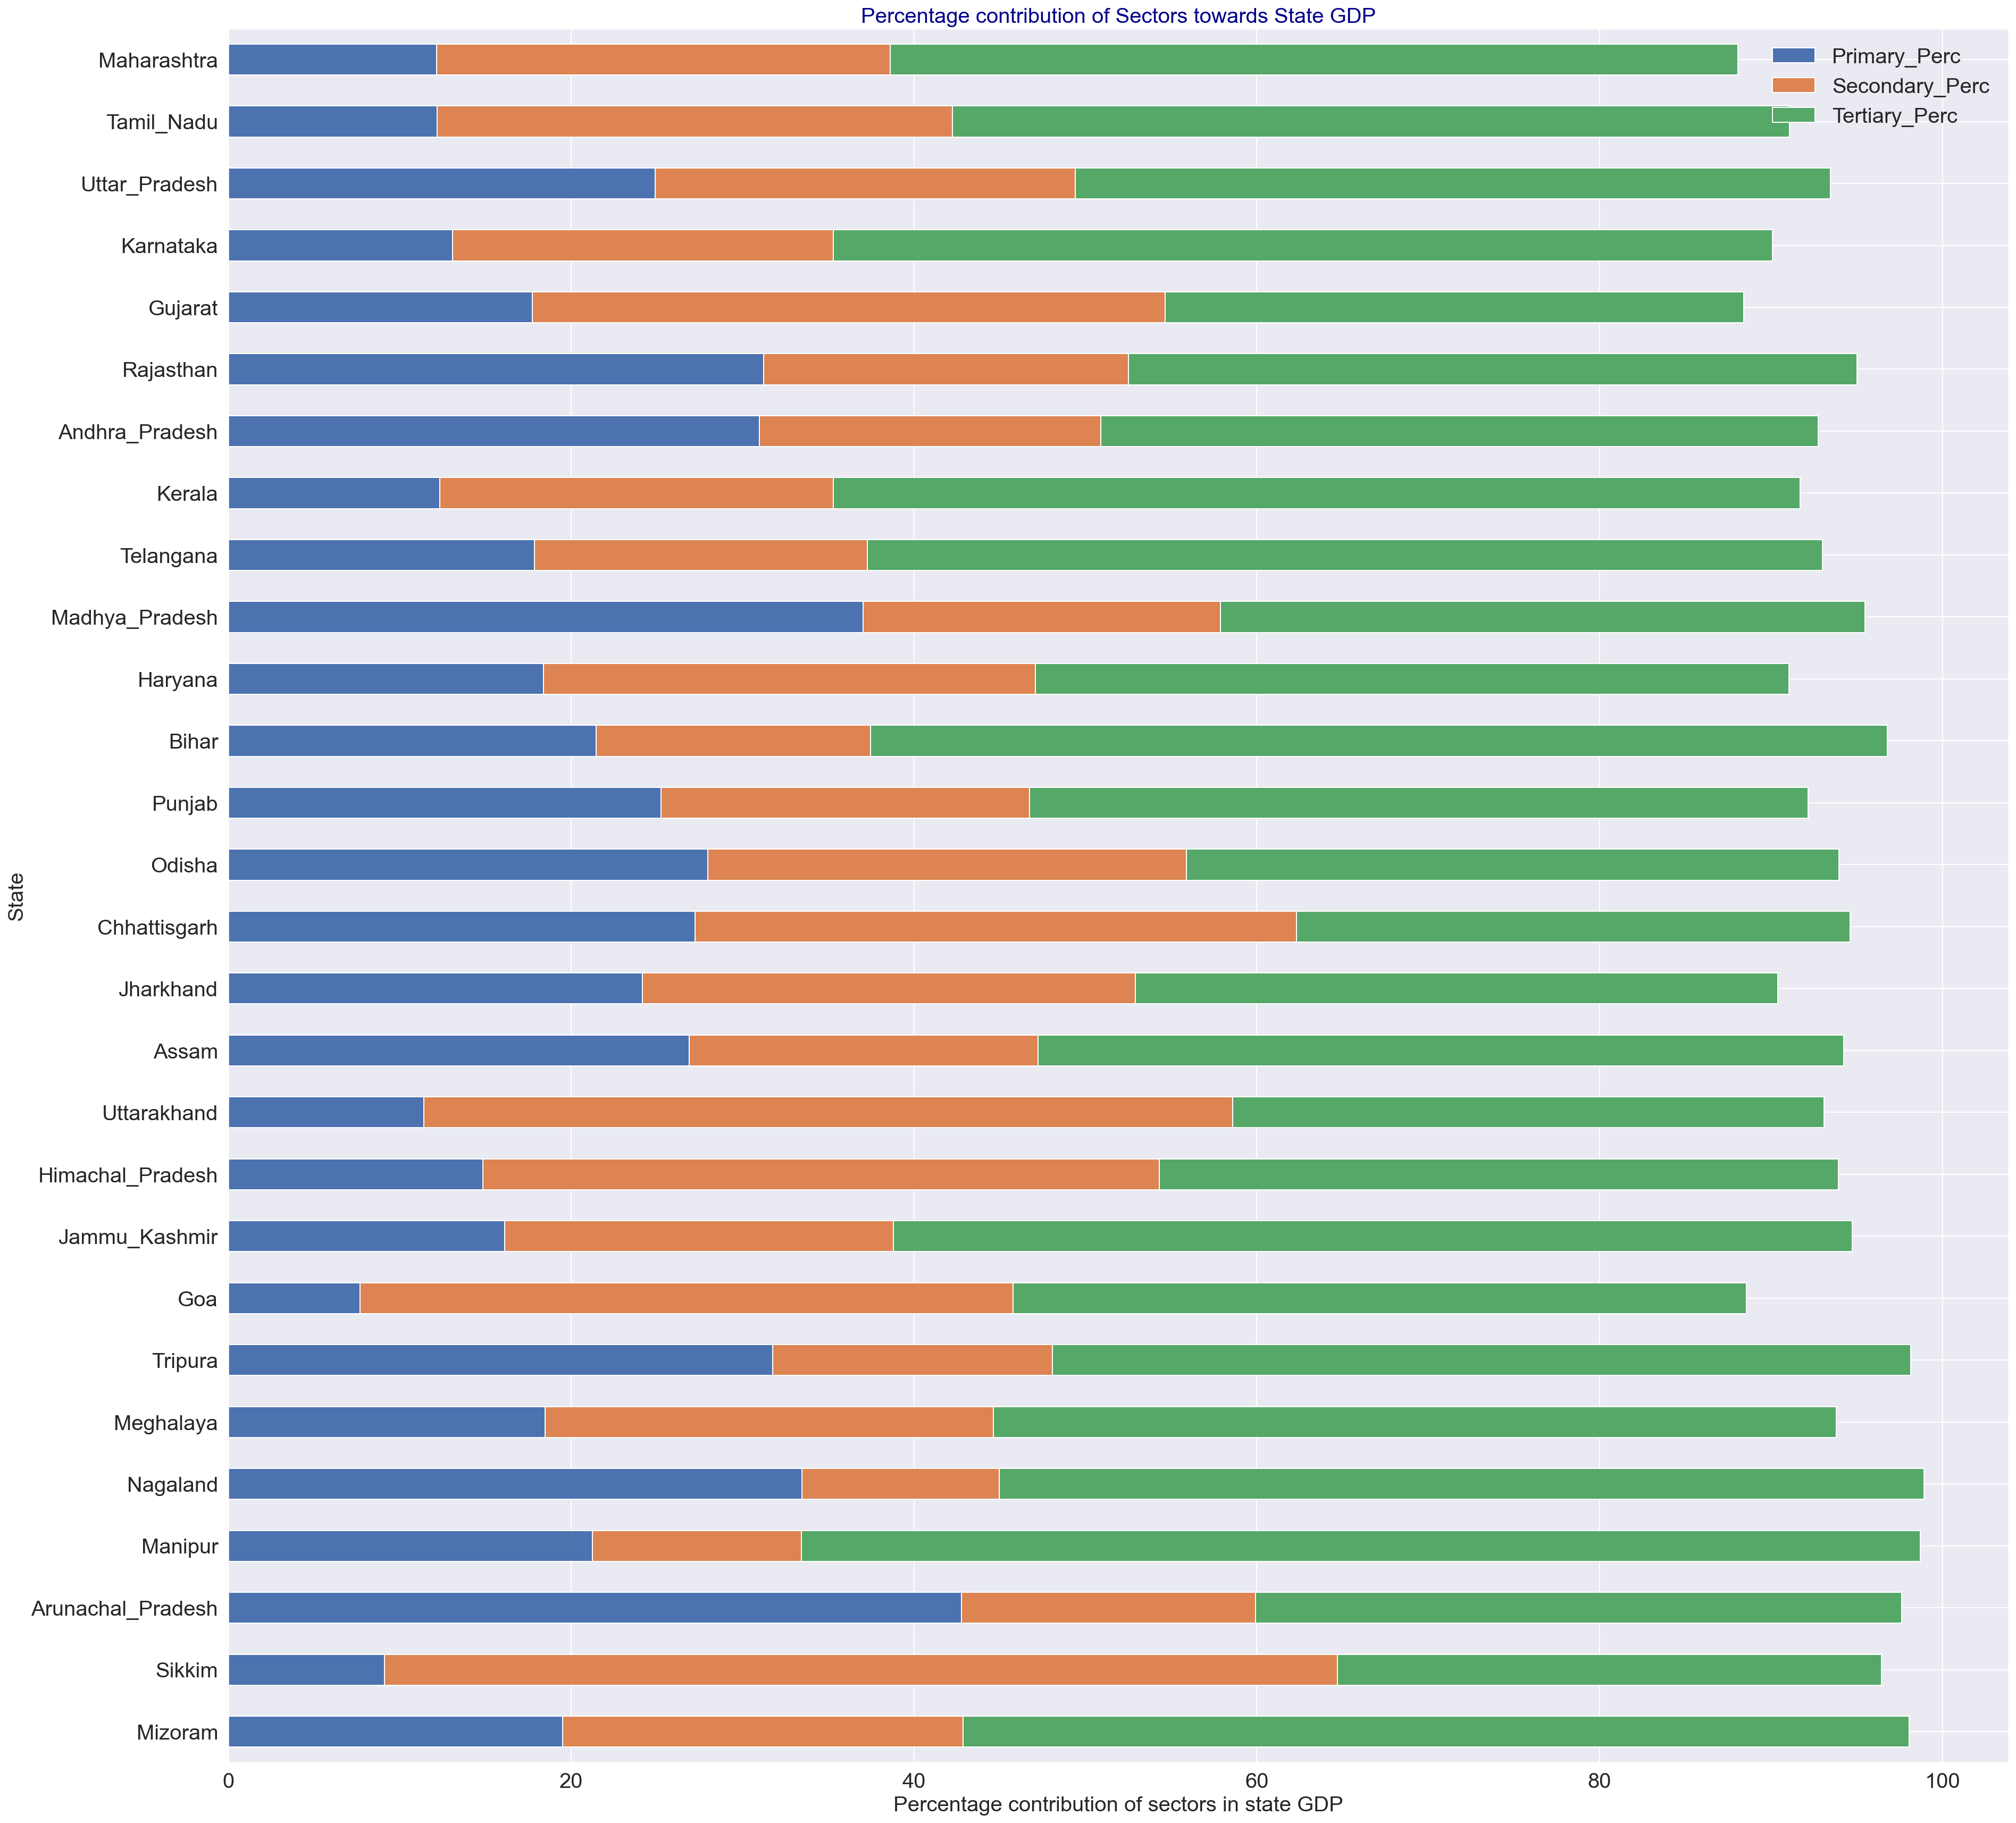

In [48]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sort_gsdp_df[['State','Primary_Perc','Secondary_Perc','Tertiary_Perc']
            ].set_index('State').plot(kind='barh',stacked=True,figsize=(30,30));
plt.title('Percentage contribution of Sectors towards State GDP',color='darkblue')
plt.xlabel('Percentage contribution of sectors in state GDP')
plt.ylabel('State');
plt.legend();

# Observations from above plot

Total GDP is calculated as below

GSDP = (Primary + Secondary + Tertiary) + Taxes on Products - Subsidies on Products

Because of above calculations, (Primary + Secondary + Tertiary) alone doesnt sum up to Total GDP. Total GDP has another contribution from Taxes on Product sans Subsidies on Products

Please note that total contribution of Primary, Secondary and Tertiary is called as Total GSVA at basic prices

Maharashtra has highest GDP(179212165) followed by Tamil Nadu(109256373) and Uttar Pradesh(104337115).

Tertiary sector is the main contributor to Maharashtra, Tamil Nadu and Uttar Pradesh states GDP

Highest contribution from Primary sector is for State Arunachal Pradesh(42.77%)

Highest contribution from Secondary Sector is for State Sikkim(55.57%)

Highest contribution from Tertiary Sector is for State Manipur (65.25%)

# Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.

In [49]:
all_states_df['Percentile_Rank'] = round(all_states_df['Gross State Domestic Product'].rank(pct=True),2)
all_states_df

Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
5          Chhattisgarh                           3948847   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
5                 2451970     6400817       4370593   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587           1733568   
3                                                345168           3449763   
5                                               1198438           2669855   
7                                                204110            165819   
8                                             3409983.0         5526017.0   
9                 

In [50]:
all_states_df['Percentile_Corr'] = round(all_states_df['Primary_Perc'].corr(all_states_df['Percentile_Rank']),2)
all_states_df

Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
5          Chhattisgarh                           3948847   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
5                 2451970     6400817       4370593   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587           1733568   
3                                                345168           3449763   
5                                               1198438           2669855   
7                                                204110            165819   
8                                             3409983.0         5526017.0   
9                 

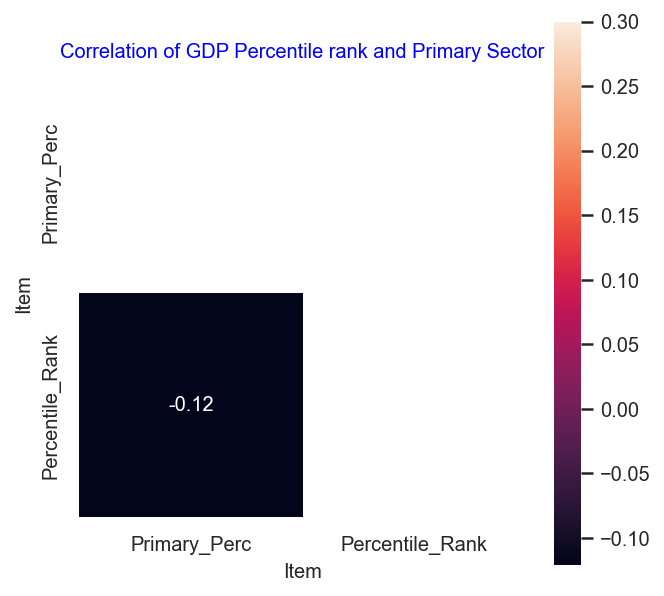

In [51]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
numeric_col_heatmap = ['Primary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Primary Sector",color='blue');

# Observation from above plot

It can be seen that there is negative correlation(-0.12) between percentile rank of state GDP and Primary Sector Contribution. With Lower GDP, the %contribution of Primary Sector is higher and vice versa

# Extra - Correlation between State GDP Percentile rank and %Contribution of Secondary and Tertiary Sectors

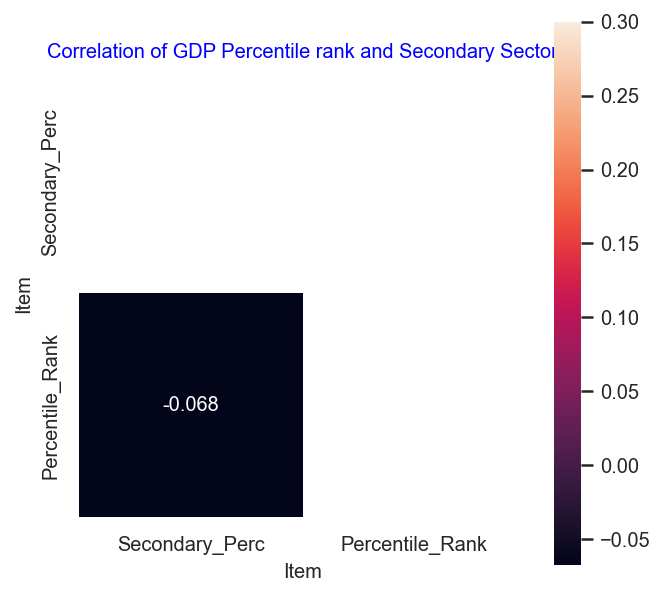

In [52]:
numeric_col_heatmap = ['Secondary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Secondary Sector",color='blue');


# Observation from above plot

It can be seen that there is negative correlation(-0.068) between percentile rank of state GDP and Secondary Sector Contribution. With Lower GDP, the %contribution of Secondary Sector is higher and vice versa

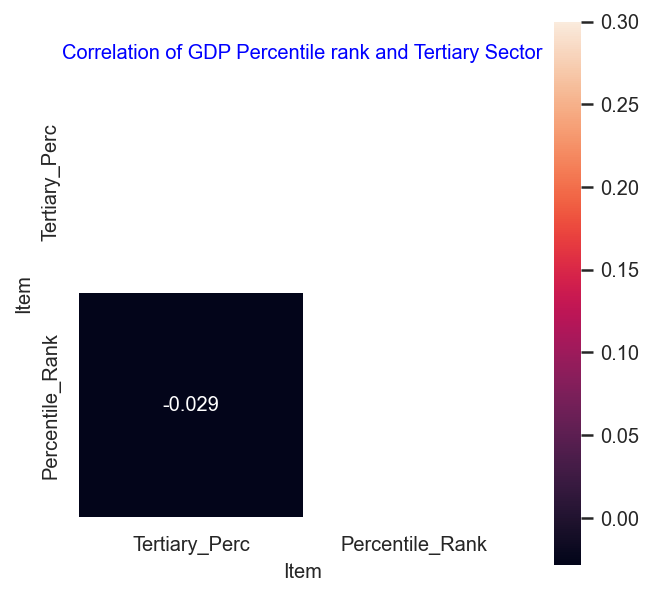

In [53]:
numeric_col_heatmap = ['Tertiary_Perc','Percentile_Rank']
plt.figure(figsize=(5,5))
mask = np.zeros_like(all_states_df[numeric_col_heatmap].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(all_states_df[numeric_col_heatmap].corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation of GDP Percentile rank and Tertiary Sector",color='blue');


# Observation from above plot


It can be seen that there is negative correlation(-0.029) between percentile rank of state GDP and Tertiary Sector Contribution. With Lower GDP, the %contribution of Tertiary Sector is higher and vice versa


# Comparison of GSDP Percentile rank and %Contribution of sectors


From above plots it can be seen that amongst three sectors, Primary Sector is most negatively correlated. In other words with lower State GDP, the %Contribution of Primary Sector is most

# Categorise states into four groups based on the GDP per capita (C1, C2, C3, C4)


As per assignment, Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [54]:
state_category_df = all_states_df.copy()
category_labels = ['C4', 'C3', 'C2', 'C1']
state_category_df['Category'] = pd.qcut(state_category_df['Per Capita GSDP (Rs.)'],
                              q=[0, 0.2, .5, .85, 1],
                              labels=category_labels)
state_category_df


Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
5          Chhattisgarh                           3948847   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
5                 2451970     6400817       4370593   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587           1733568   
3                                                345168           3449763   
5                                               1198438           2669855   
7                                                204110            165819   
8                                             3409983.0         5526017.0   
9                 

In [55]:
state_category_df['Per Capita GSDP (Rs.)'].quantile(0.5)

101332.0

# For each category (C1, C2, C3, C4):


Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.

Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)

Plot the contribution of the sub-sectors as a percentage of the GSDP of each category



# Common Function to plot Sub Sectors that contribute to 80% of GSDP belonging to different category

In [56]:
def plot_cetgory(df_category_state,category_list):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(category_list))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8,8*len(category_list)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, category in enumerate(category_list):
        
        ##Filter dataframe based on category
        df2_copy_df= df_category_state[df_category_state['Category']==category]
        #since we have already filtered catgeory so we can drop the category in this dataframe
        df2_copy_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                                 'Taxes on Products','Subsidies on products',"Population ('00)",'Primary_Perc',
                        'Secondary_Perc','Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc','Category'],
                        inplace=True)

        ##Transpose the data
        df2_copy_df = df2_copy_df.T

        ##take the row at index location1 and save it in header variable
        new_header = df2_copy_df.iloc[0]
        df2_copy_df.columns = new_header

        df2_copy_df = df2_copy_df[1:]

        # Create Total column - this is the total of each sub-sector across all states
        df2_copy_df['Total'] = df2_copy_df.sum(axis=1)

        # Get Total GSDP of all states belonging to that selected category
        total_gsdp = df2_copy_df.loc['Gross State Domestic Product']['Total']
        
        # Create column of sectorwise percentage wrt Total GSDP
        df2_copy_df['Sector_Per']=round(df2_copy_df['Total']/total_gsdp,2)*100
        
        # Sort the values by Sector wise percentage in descending order
        df2_copy_df.sort_values(by='Sector_Per',ascending=False,inplace=True)
        df2_copy_df
        
        # taking subset of above dataframe to remove GSDP ratio from dataframe
        df2_copy_df = df2_copy_df[1:]

        # Take cumulative sum of sector wise percentage
        df2_copy_df['Cum_Sum'] = df2_copy_df['Sector_Per'].cumsum()

    #     df2_copy_df[df2_copy_df['Cum_Sum']<80]['Cum_Sum'].plot(kind='barh',figsize=(8,8));
    #     plt.title('Sectors that contribute to approximately 80% of the GSDP of category: {0}'.format(category),
    #               color='blue')
    #     plt.xlabel('Cumulative Sum of Sub Sectors percentage')
    #     plt.ylabel('Sub Sectors')
        #sns.barplot(df2_copy_df[df2_copy_df['Cum_Sum']<80]['Cum_Sum'], ax=ax[i])
        
        # Plot the cumulative sum of percentage of sub sectors that contribute to 80% of GSDP. Select only top 5
        df2_copy_df[df2_copy_df['Cum_Sum']<80]['Sector_Per'][0:5].sort_values().plot(kind='barh',ax=ax[i])
        ax[i].set_title('Sub Sectors that contribute to approximately 80% of the GSDP of category: {0}'.format(category),
                        color='blue')
        ax[i].set_xlabel('Sub Sectors %Contribution') 
        ax[i].set_ylabel('Sub Sectors')

# Plot sub sectors that contribute to 80% of GSDP of categories - C1, C2, C3, C4


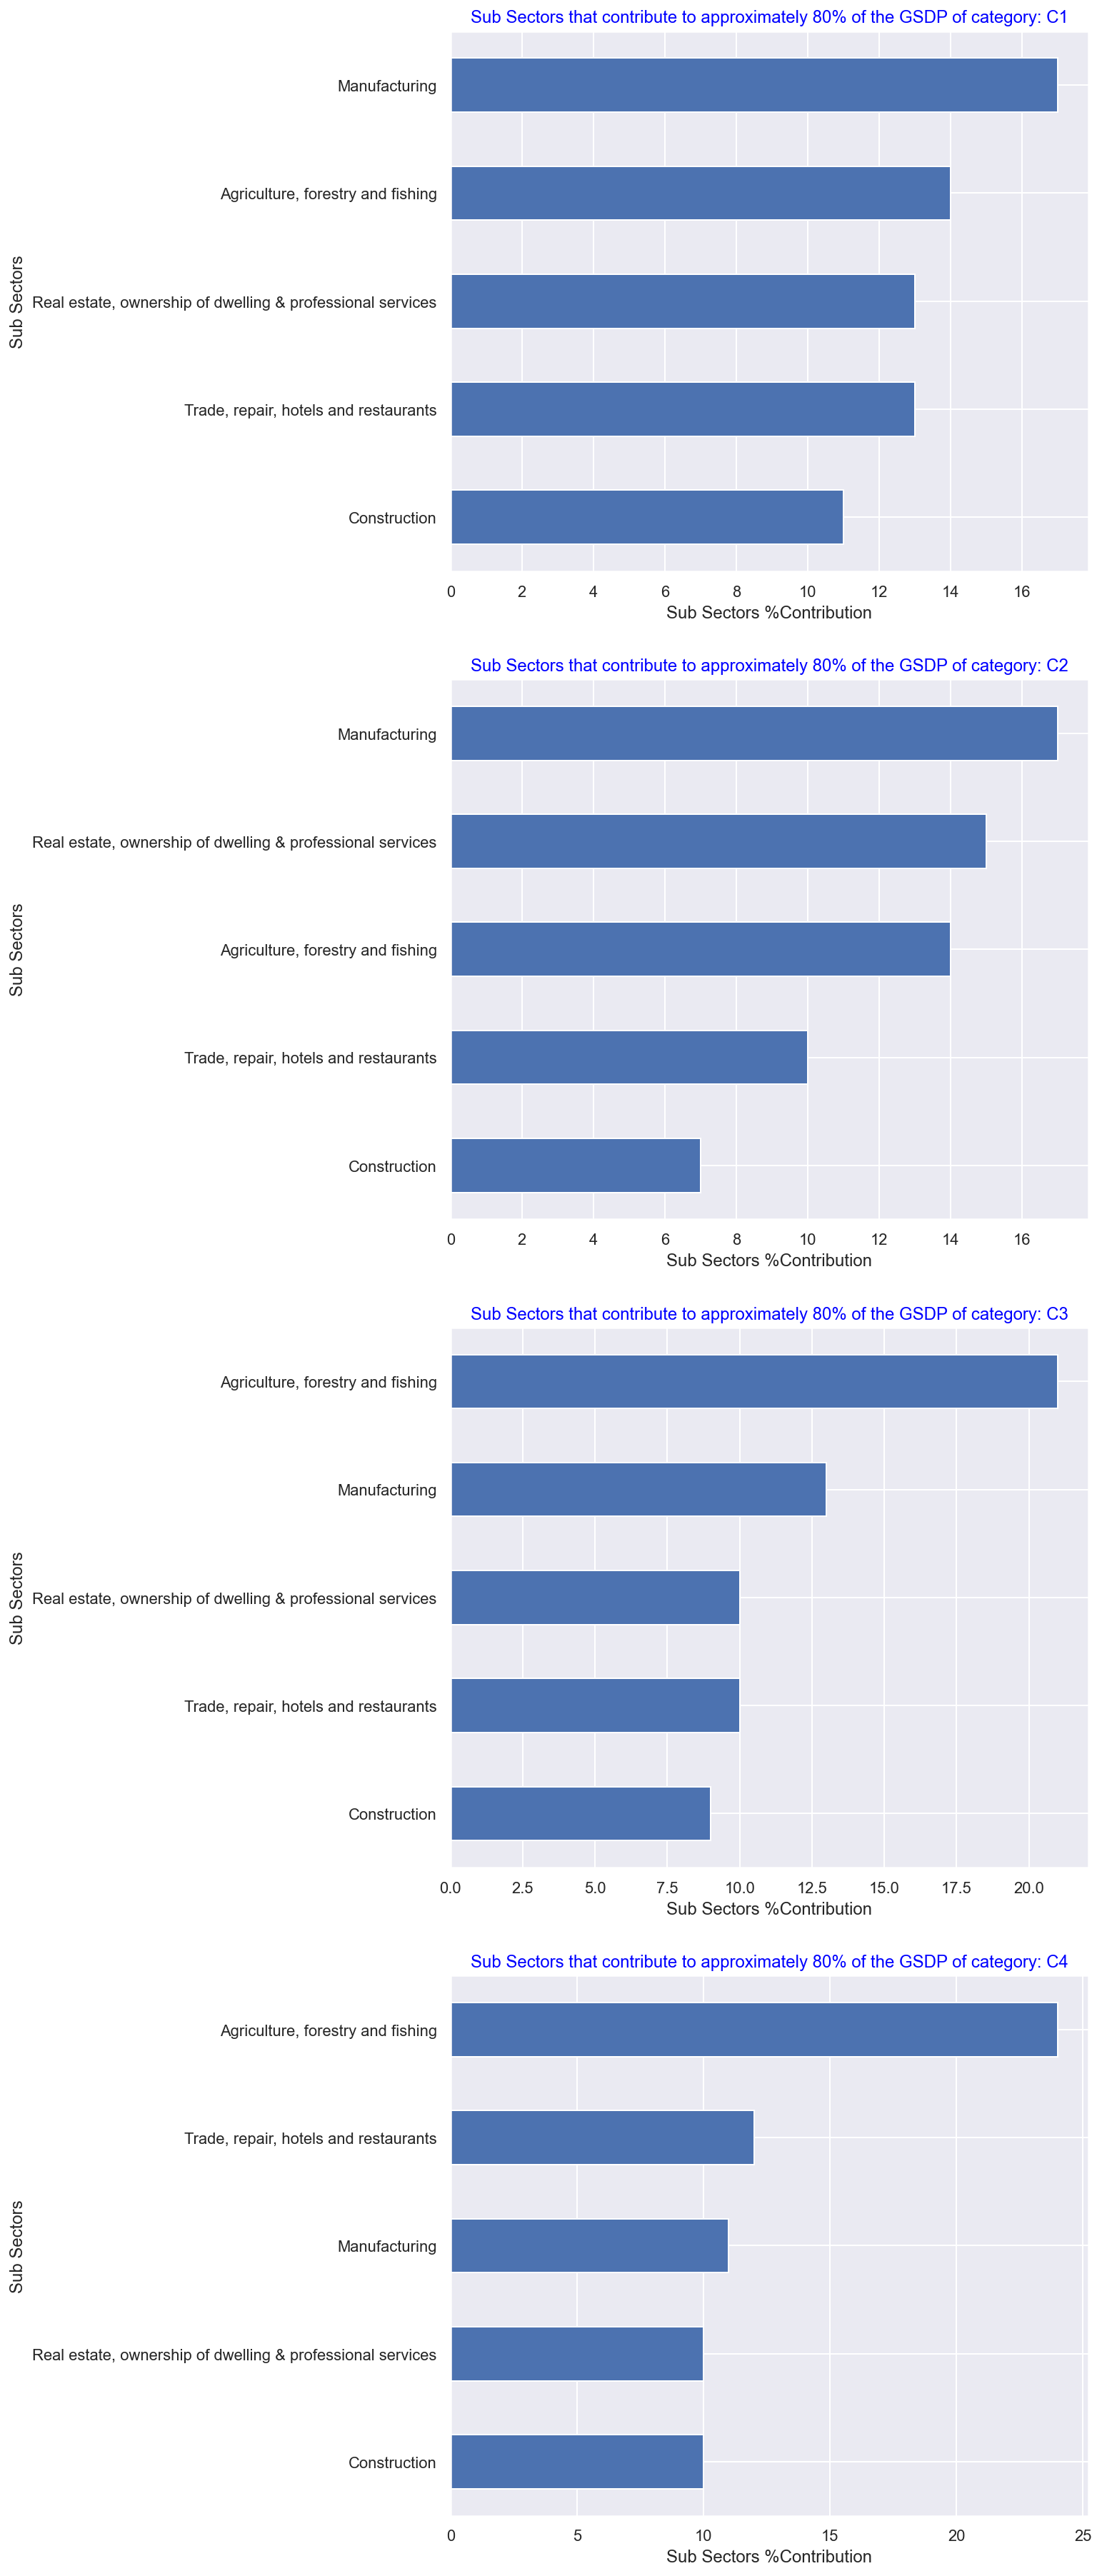

In [57]:
#create category list
category_list = ['C1','C2','C3','C4']

#Call the function to subplot subsectors that contribute to 80% of GSDP - categorywise
plot_cetgory(state_category_df,category_list)


# Observations from above Plot


# sub sectors that contribute to 80% of GSDP of categories - C1, i.e. for the states lying between the 85th and the 100th percentile -

Manufacturing

Agriculture, forestry and fishing

Real estate, ownership of dwelling & professional services

Trade, repair, hotels and restaurants

Construction

# sub sectors that contribute to 80% of GSDP of categories - C2, i.e. for the states lying between the 50th and the 85th percentile -

Manufacturing

Real estate, ownership of dwelling & professional services

Agriculture, forestry and fishing

Trade, repair, hotels and restaurants

Construction


# sub sectors that contribute to 80% of GSDP of categories - C3, i.e. for the states lying between the 25th and the 50th percentile -

Agriculture, forestry and fishing

Manufacturing

Real estate, ownership of dwelling & professional services

Trade, repair, hotels and restaurants

Construction

# sub sectors that contribute to 80% of GSDP of categories - C4, i.e. for the states lying in 20th percentile -

Agriculture, forestry and fishing

Trade, repair, hotels and restaurants

Manufacturing

Real estate, ownership of dwelling & professional services

Construction

# Extra for presentation - States belonging to different categories

In [60]:
#pd.options.display.float_format = "{:.0f}".format
c1_cat_df= state_category_df[state_category_df['Category']=='C1']
c1_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item        State Per Capita GSDP (Rs.) Category
7             Goa                271793       C1
25         Sikkim                240274       C1
9         Haryana              164077.0       C1
14         Kerala                154778       C1
29    Uttarakhand              153076.0       C1

In [61]:
c2_cat_df= state_category_df[state_category_df['Category']=='C2']
c2_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item              State Per Capita GSDP (Rs.) Category
16          Maharashtra                152853       C2
10     Himachal_Pradesh                147330       C2
26           Tamil_Nadu                146503       C2
13            Karnataka                145141       C2
8               Gujarat              141263.0       C2
27            Telangana                139035       C2
23               Punjab                126606       C2
1     Arunachal_Pradesh                112718       C2
0        Andhra_Pradesh                104977       C2

In [62]:
c3_cat_df= state_category_df[state_category_df['Category']=='C3']
c3_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item          State Per Capita GSDP (Rs.) Category
19          Mizoram                 97687       C3
20         Nagaland                 89607       C3
5      Chhattisgarh                 86860       C3
24        Rajasthan                 84837       C3
28          Tripura               77358.0       C3
18        Meghalaya               76228.0       C3
11    Jammu_Kashmir                 75840       C3
21           Odisha                 73979       C3

In [63]:
c4_cat_df= state_category_df[state_category_df['Category']=='C4']
c4_cat_df[['State','Per Capita GSDP (Rs.)','Category']].sort_values(by='Per Capita GSDP (Rs.)',ascending=False)

Item           State Per Capita GSDP (Rs.) Category
15    Madhya_Pradesh                 62989       C4
12         Jharkhand                 62091       C4
2              Assam                 60621       C4
17           Manipur               58442.0       C4
30     Uttar_Pradesh                 49450       C4
3              Bihar                 33954       C4

# Plot GDP distribution of Catgeories - C1, C2, C3, C4

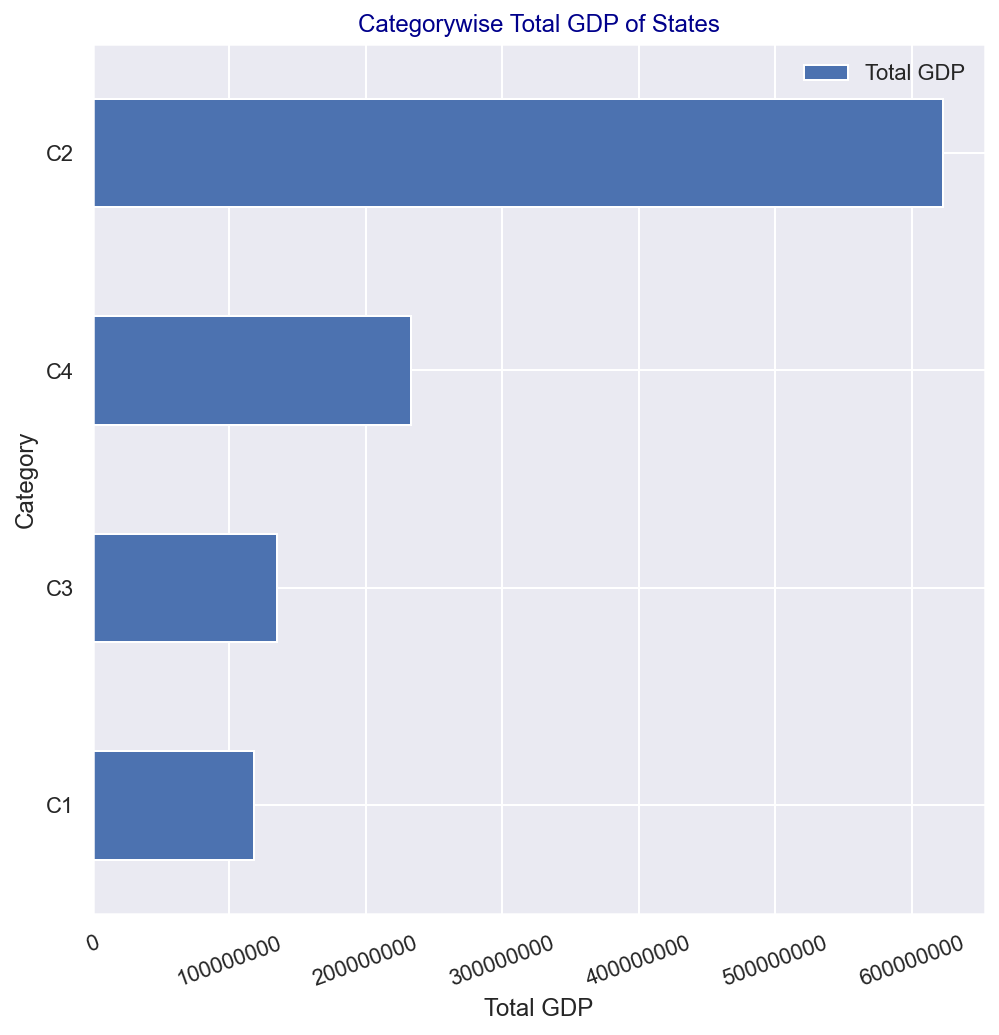

In [64]:
#create category list
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
category_list = ['C1','C2','C3','C4']
df1 = pd.DataFrame(columns=['C1','C2','C3','C4'])
#Call the function to subplot Cetegorywise GDP dstribution of various states
for category in category_list:
    df1['{0}'.format(category)]= [state_category_df[state_category_df['Category']==category
                                                            ]['Gross State Domestic Product'].sum()]
df1 = df1.T.rename(columns={0:'Total GDP'}).sort_values(by='Total GDP',ascending=True)
df1.plot(kind='barh',figsize=(8,8));
plt.title('Categorywise Total GDP of States',color='darkblue')
plt.xlabel('Total GDP')
plt.ylabel('Category');
plt.ticklabel_format(axis="x", style='plain')
plt.xticks(rotation=20);
#plt.xticks(range(10000000,900000000,80000000),rotation=20);

# Observations from above Plot

States belonging to Category C2 (i.e. States between the 50th and the 85th percentiles of GDP per Capita) have higher GDP in comparison to states belonging to other categories

States belonging to Category C1 (i.e. States between the 80th and the 100th percentiles of GDP per Capita) have lowest GDP in comparison to states belonging to other categories

# Correlation of Sub-sectors with GDP of states

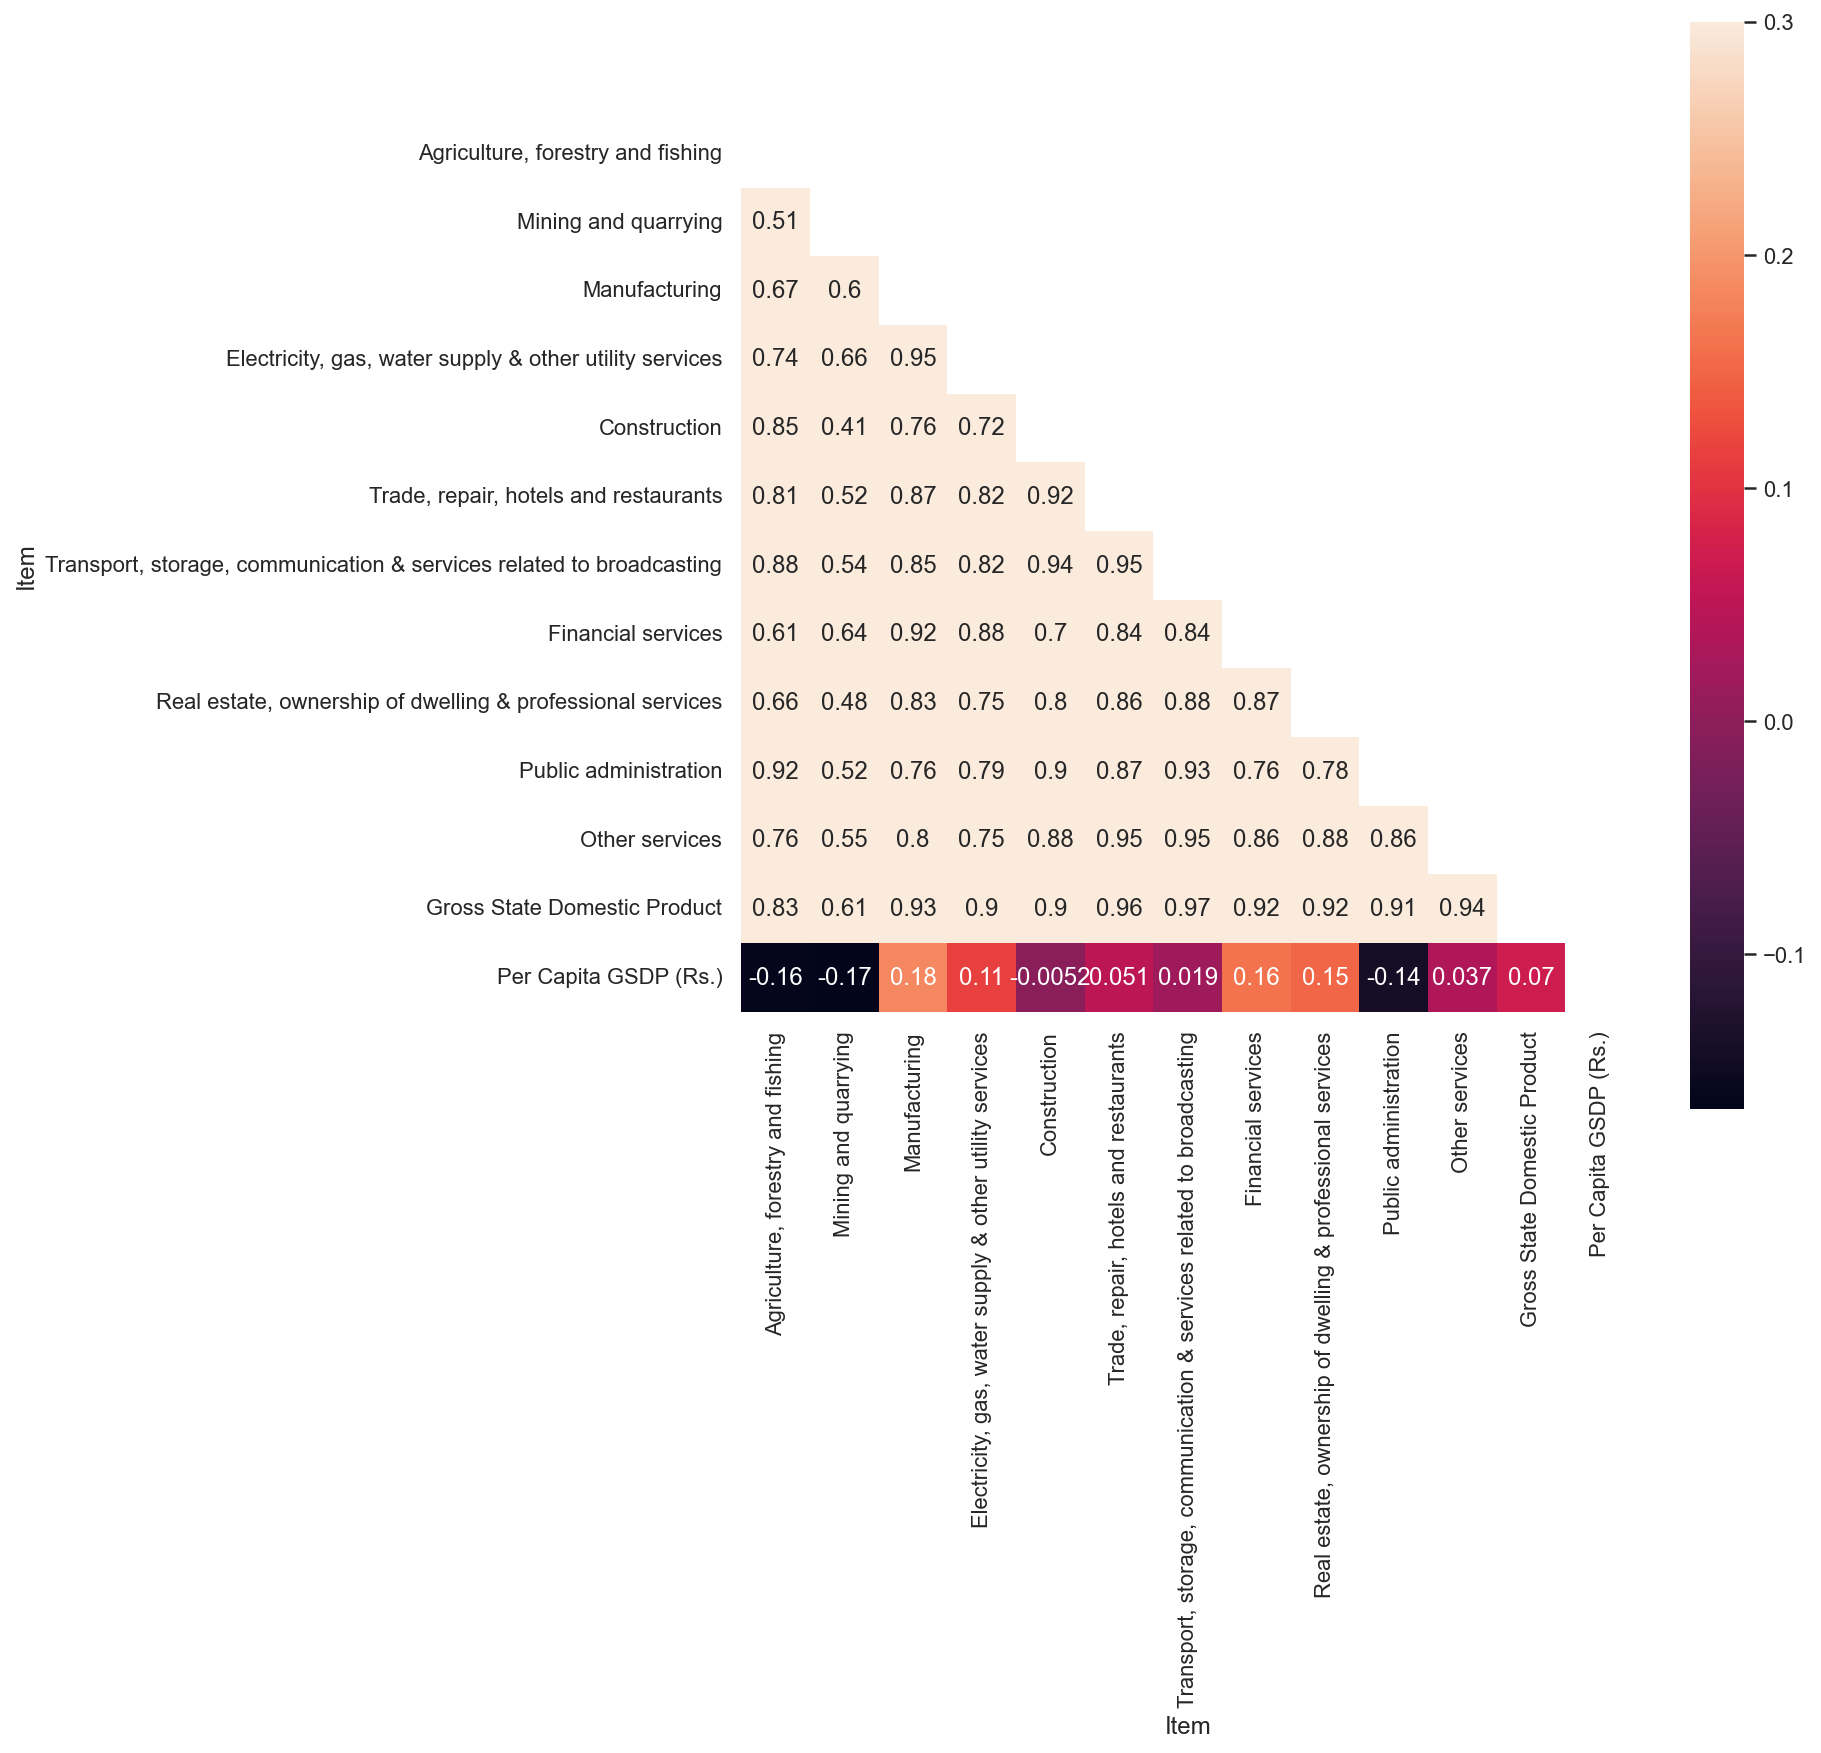

In [65]:
states_cat_df = state_category_df.copy()
# drop unnecessary columns from dataframe
states_cat_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                            'Taxes on Products','Subsidies on products',
                            "Population ('00)",'Primary_Perc','Secondary_Perc',
                            'Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc',
                            'Percentile_Rank','Percentile_Corr','Category'],inplace=True)
numeric_cols = [col for col in states_cat_df if (col!='State')]
states_cat_df[numeric_cols] = states_cat_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(10,10))
mask = np.zeros_like(states_cat_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(states_cat_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');

# Observation from above Plot

Sub-sectors Transport, storage, communication & services related to broadcasting (0.97), Trade, repair, hotels and restaurants(0.96), Manufacturing(0.93), Other Services(0.94) are very positively correlated to GDP of states.

This means Secondary and Tertiary sectors are very positively correlated with State GDP

In other words increase in growth in these sectors will result in increase in GDP growth. So government must focus on these sectors for increase in growth of state GDP

# Plot Sub-sector and State GDP correlation for each Category


In [66]:
def plot_subsector_performance(df_category_state,category_list):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(category_list))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(8,8*len(category_list)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, category in enumerate(category_list):
        
        ##Filter dataframe based on category
        df2_copy_df= df_category_state[df_category_state['Category']==category]
        #since we have already filtered catgeory so we can drop the category in this dataframe
        df2_copy_df.drop(columns=['Primary','Secondary','Tertiary','TOTAL GSVA at basic prices',
                                    'Taxes on Products','Subsidies on products',
                                    "Population ('00)",'Primary_Perc','Secondary_Perc',
                                    'Tertiary_Perc','AllSectors_Perc','Taxes_Perc','Subsidies_Perc',
                                    'Percentile_Rank','Percentile_Corr','Category','Per Capita GSDP (Rs.)',
                                 'Gross State Domestic Product'],
                        inplace=True)

        ##Transpose the data
        df2_copy_df = df2_copy_df.T

        ##take the row at index location1 and save it in header variable
        new_header = df2_copy_df.iloc[0]
        df2_copy_df.columns = new_header

        df2_copy_df = df2_copy_df[1:]

        # Create Total column - this is the total of each sub-sector across all states
        df2_copy_df['Total'] = df2_copy_df.sum(axis=1)
        df2_copy_df['Total'].sort_values().plot(kind='barh',ax=ax[i])
        #print(df2_copy_df['Total'].sort_values())
        ax[i].set_title('Sectors that contribute to GDP of category: {0} states'.format(category),
                        color='blue')
        ax[i].set_xlabel('Total contribution of sectors') 
        ax[i].set_ylabel('Sub Sectors')
        ax[i].ticklabel_format(axis="x", style='plain')
        #ax[i].set_xticks(rotation=20);
        #ax[i].set_xticks(range(100000,15000000,200000));

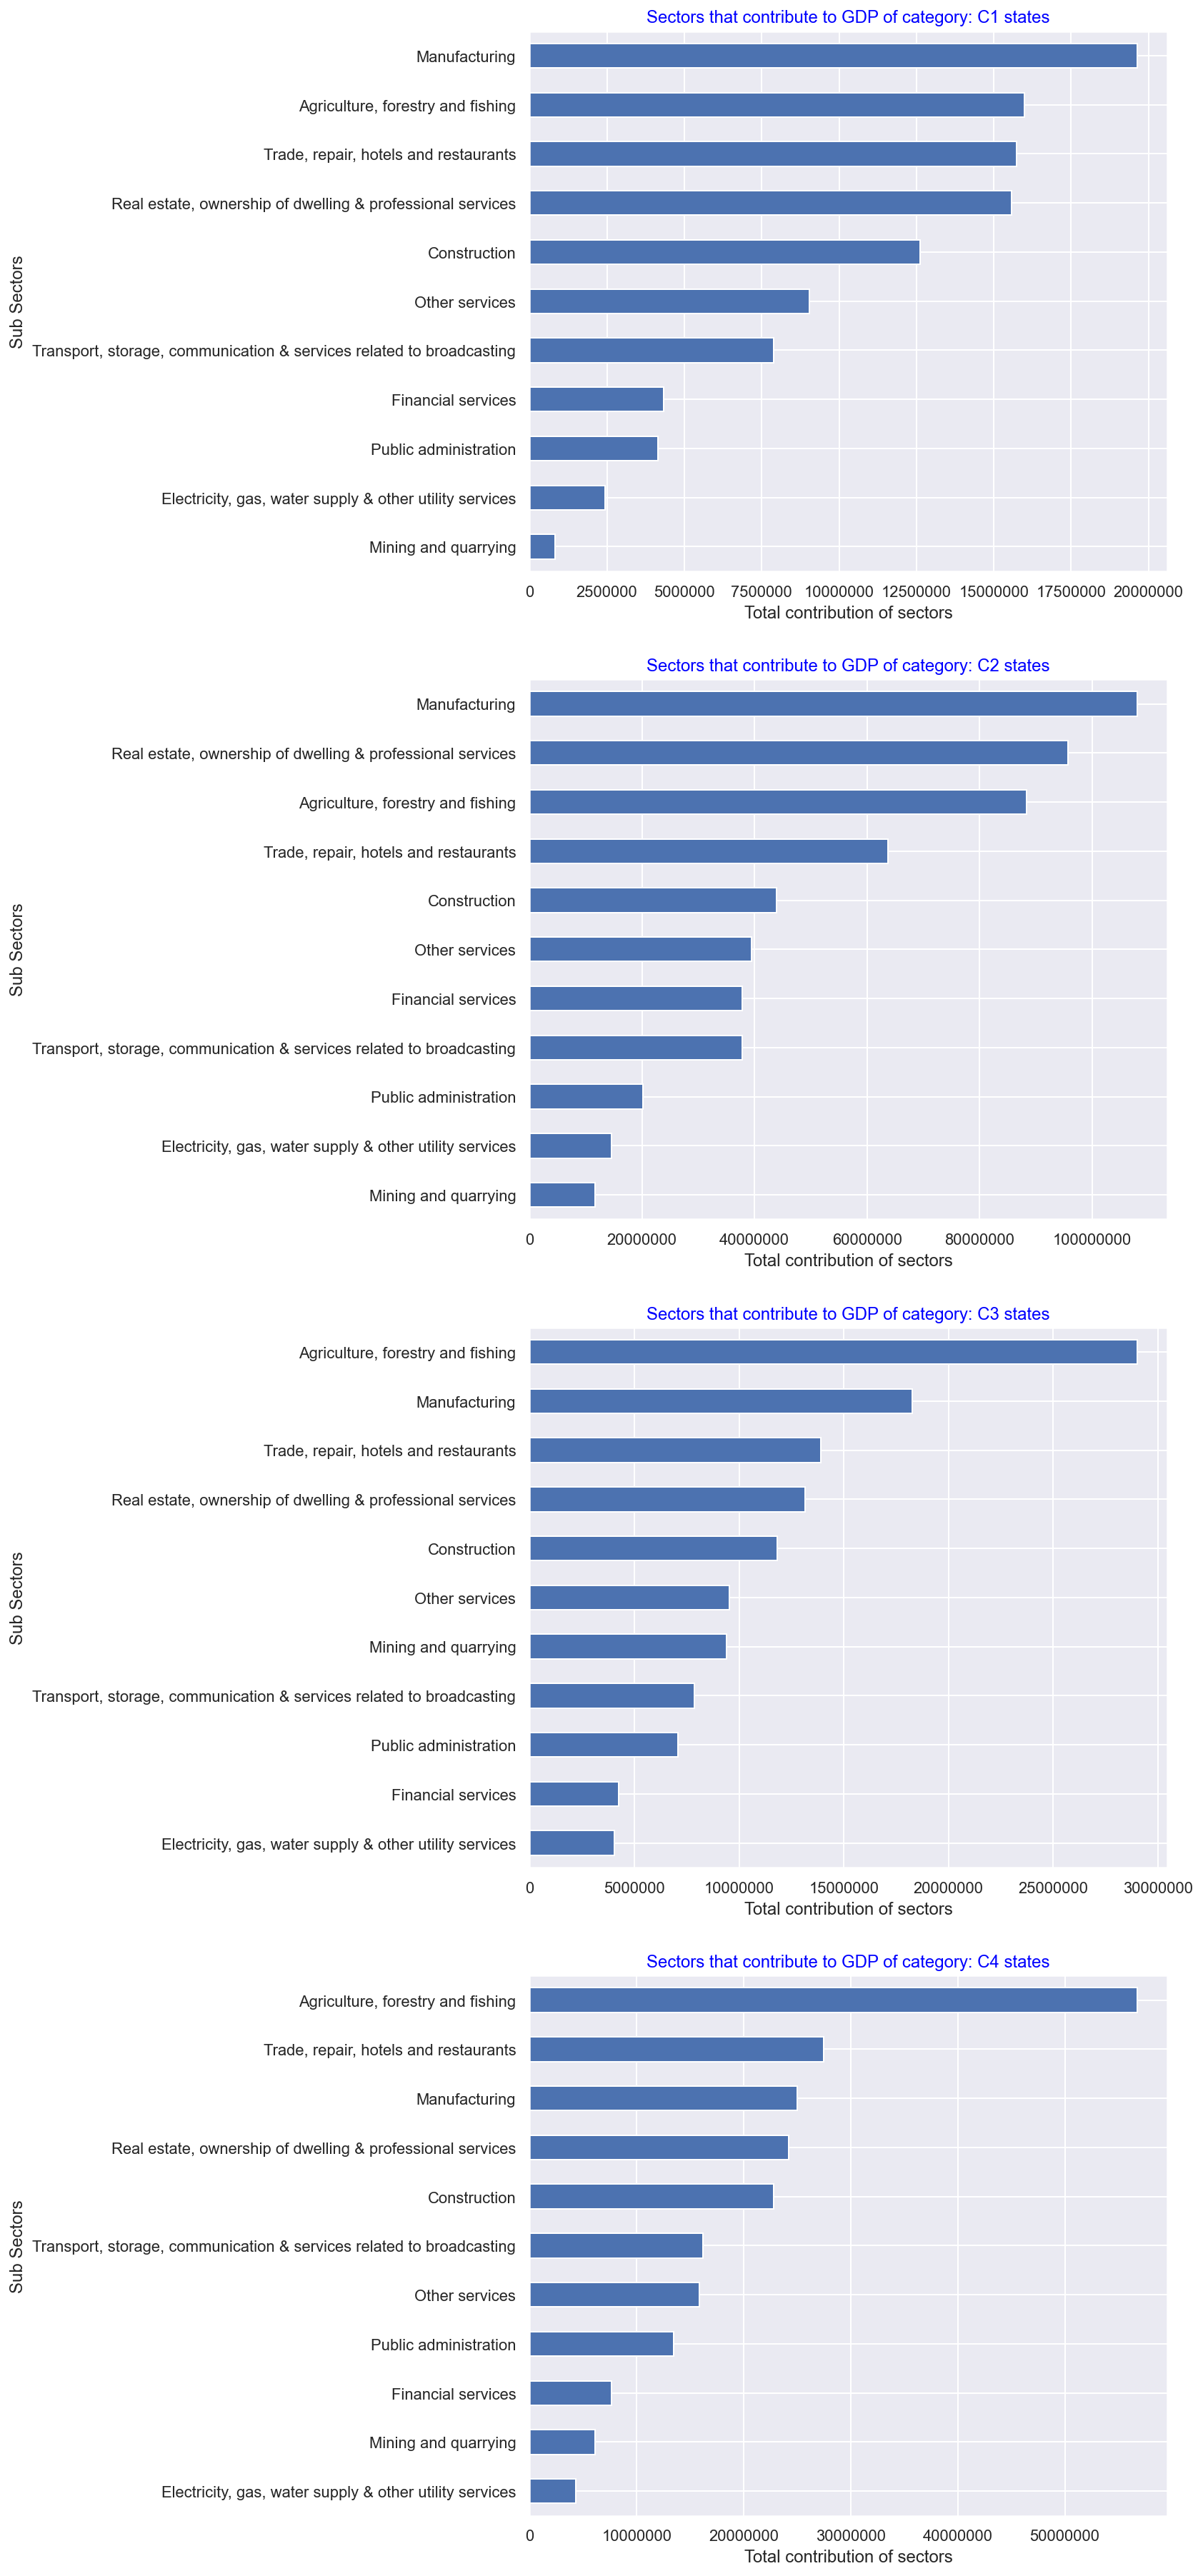

In [67]:
#create category list
category_list = ['C1','C2','C3','C4']

#Call the function to subplot Cetegorywise heatmap of various states
plot_subsector_performance(state_category_df,category_list)

# Observations and recommendations from above plot



# For Categroy C1:


Highly performing sectors are

    1.Manufacturing

    2.Agriculture, forestry and fishing

    3.Trade, repair, hotels and restaurants

    4.Real estate, ownership of dwelling & professional services

Recommendation - States must keep on focusing on Manufacturing, Agriculture by bringing efficiency and automation, Real Estate and Hotels, Restaurant to increase GDP growth

Low performaing sectors are
    
    1.Mining and quarrying 
    
    2.Electricity, gas, water supply & other utility services

    3.Public Administration
Recommendation - Government must focus on improving these sectors so that these sectors also start contributing more towards the growth of State GDP

# For Categroy C2:

Highly performing sectors are
          
    1.Manufacturing
    
    2.Real estate, ownership of dwelling & professional services
    
    3.Agriculture, forestry and fishing
    
    4.Trade, repair, hotels and restaurants
Recommendation - State must keep on focusing Manufacturing (bring skilled labor and automation) and Real Estate for category C2 states to increase state GDP

Low performing sectors are

    1.Mining and quarrying

    2.Electricity, gas, water supply & other utility services

Recommendation - Government must focus on improving these sectors so that these sectors also start contributing more towards the growth of State GDP

# For Categroy C3:

Highly performing sectors are

    1.Agriculture, forestry and fishing

    2.Manufacturing

    3.Trade, repair, hotels and restaurants

Recommendation - Agriculture, forestry and fishing is the major contributing sector towards state GDP for category C3 states. 
Government must keep on focusing Agriculture to further increase it contribution towards State GDP

Low performing sectors are

    1.Electricity, gas, water supply & other utility services

    2.Financial Services

Recommendation - Government must focus on Financial Services and also improving Utility Services sector so that these sectors can contribute more towards state GDP

# For Categroy C4:

Highly performing sectors are

    1.Agriculture, forestry and fishing

    2.Trade, repair, hotels and restaurants

    3.Manufacturing

    4.Real estate, ownership of dwelling & professional services

Recommendation - Government must keep on focusing Agriculture and bring measures and incentive to boost manufacturing to increase State GDP

Low performing sectors are

    1.Electricity, gas, water supply & other utility services

    2.Mining and quarrying

Recommendation - Government must focus on Utility and services sector and mining and quarrying sector to increase State GDP

#### Overall Agriculture, Real Estate are high performing sectors. Government must continue to focus on these sectors. Utility Services sector is the lowest performing sector and government must focus to improve this sector to improve of State GDP growth



# Part-II: GDP and Education Dropout Rates

# Load File

In [69]:

dropout_df = pd.read_csv('rs_session243_au570_1.1.csv')
dropout_df.head()

Sl. No. Level of Education - State  Primary - 2012-2013  \
0       1              A & N Islands                 0.68   
1       2             Andhra Pradesh                 3.18   
2       3          Arunachal Pradesh                15.16   
3       4                      Assam                 6.24   
4       5                      Bihar                  NaN   

   Primary - 2014-2015  Primary - 2014-2015.1  Upper Primary - 2012-2013  \
0                 1.21                   0.51                       1.23   
1                 4.35                   6.72                       3.36   
2                10.89                  10.82                       7.47   
3                 7.44                  15.36                       7.20   
4                 2.09                    NaN                        NaN   

   Upper Primary - 2013-2014  Upper Primary - 2014-2015  \
0                       0.51                       1.69   
1                       3.78                       5.20   
2                       5.59                       6.71   
3                       7.05                      10.51   
4                       2.98                       4.08   

   Secondary - 2012-2013  Secondary - 2013-2014  Secondary - 2014-2015  \
0                   5.56                   7.20                   9.87   
1                  12.72                  12.65                  15.71   
2                  12.93                  14.49                  17.11   
3                  26.77                  30.43                  27.06   
4                  30.14                  25.33                  25.90   

   Senior Secondary - 2012-2013  Senior Secondary - 2013-2014  \
0                         14.14                         15.87   
1                          0.35                         11.79   
2                          5.11                         17.07   
3                          4.69                          7.24   
4                           NaN                           NaN   

   Senior Secondary - 2014-2015  
0                         16.93  
1                           NaN  
2                         18.42  
3                           NaN  
4                           NaN

# Check for shape, missing and duplicate values

In [70]:
pd.DataFrame([[dropout_df.shape],
            [dropout_df.isnull().sum().sum()],
             [dropout_df.duplicated().sum()]],
            columns = ['Dropout Rate Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

Dropout Rate Data Set
Shape                    (37, 14)
Missingness                    65
Duplicates                      0

# Observations from above cell

There are 37 rows and 14 columns

There are total 65 missing values and there are no duplicate values

# DataSet Info

In [71]:
dropout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sl. No.                       37 non-null     object 
 1   Level of Education - State    37 non-null     object 
 2   Primary - 2012-2013           29 non-null     float64
 3   Primary - 2014-2015           33 non-null     float64
 4   Primary - 2014-2015.1         31 non-null     float64
 5   Upper Primary - 2012-2013     31 non-null     float64
 6   Upper Primary - 2013-2014     35 non-null     float64
 7   Upper Primary - 2014-2015     35 non-null     float64
 8   Secondary - 2012-2013         34 non-null     float64
 9   Secondary - 2013-2014         36 non-null     float64
 10  Secondary - 2014-2015         36 non-null     float64
 11  Senior Secondary - 2012-2013  24 non-null     float64
 12  Senior Secondary - 2013-2014  27 non-null     float64
 13  Senior 

# Observations from above cell


The dropout rates are in float

There are two columns - Primary - 2015-2015 and Primary 2014-2015.1

     Keeping only most relevant column - Primary 2014-15.1

Missing values has already been explained in above cells


# Since we need only data for States so dropping the Union Territory rows

In [72]:
dropout_df['Level of Education - State'].value_counts

<bound method IndexOpsMixin.value_counts of 0            A & N Islands
1           Andhra Pradesh
2        Arunachal Pradesh
3                    Assam
4                    Bihar
5               Chandigarh
6              Chhatisgarh
7     Dadra & Nagar Haveli
8              Daman & Diu
9                    Delhi
10                     Goa
11                 Gujarat
12                 Haryana
13        Himachal Pradesh
14       Jammu and Kashmir
15               Jharkhand
16               Karnataka
17                  Kerala
18             Lakshadweep
19          Madhya Pradesh
20             Maharashtra
21                 Manipur
22               Meghalaya
23                 Mizoram
24                Nagaland
25                  Odisha
26              Puducherry
27                  Punjab
28               Rajasthan
29                  Sikkim
30              Tamil Nadu
31               Telangana
32                 Tripura
33           Uttar Pradesh
34              Uttrakhand
35         

In [73]:
print('no. of rows: {0} and columns: {1} before dropping Union Territories'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df[
     'Level of Education - State'].isin(['A & N Islands','Chandigarh','Dadra & Nagar Haveli',
                                        'Daman & Diu','Delhi','Lakshadweep','Puducherry'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping Union Territories'.
      format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 37 and columns: 14 before dropping Union Territories
no. of rows: 30 and columns: 14 after dropping Union Territories


# Since there is no information available for state West Bengal, so dropping this row from droput dataframe as well

In [74]:
print('no. of rows: {0} and columns: {1} before dropping "West Bengal" State'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df.drop(dropout_df.loc[dropout_df[
     'Level of Education - State'].isin(['West Bengal'])].index,inplace=True)
print('no. of rows: {0} and columns: {1} after dropping "West Bengal" State'.
      format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 30 and columns: 14 before dropping "West Bengal" State
no. of rows: 29 and columns: 14 after dropping "West Bengal" State


# Since we need only Primary, Upper Primary and Secondary eduction level so drop unwanted columns

Data Quality Issue - there are two columns for 2014-15 - Primary -2014-2015 and Primary 2014-2015.1

Columns Primary -2014-2015 is actually column for 2013-14

Since we need to use only 2014-15 data so keep only Primary 2014-2015.1 and rename this column to Primary 2014-2015

In [75]:
## dropping unwanted columns
print('no. of rows: {0} and columns: {1} before dropping unwanted columns'.
      format(dropout_df.shape[0],dropout_df.shape[1]))
dropout_df = dropout_df[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015',
                       'Secondary - 2014-2015']]
print('no. of rows: {0} and columns: {1} after dropping unwanted columns'.
      format(dropout_df.shape[0],dropout_df.shape[1]))

no. of rows: 29 and columns: 14 before dropping unwanted columns
no. of rows: 29 and columns: 4 after dropping unwanted columns


In [76]:
## rename column Primary 2014-2015.1 to Primary 2014-2015
dropout_df.rename(columns={'Primary - 2014-2015.1':'Primary - 2014-2015'},inplace=True)
## also rename column Level of Education - State to State
dropout_df.rename(columns={'Level of Education - State':'State'},inplace=True)
dropout_df

State  Primary - 2014-2015  Upper Primary - 2014-2015  \
1      Andhra Pradesh                 6.72                       5.20   
2   Arunachal Pradesh                10.82                       6.71   
3               Assam                15.36                      10.51   
4               Bihar                  NaN                       4.08   
6         Chhatisgarh                 2.91                       5.85   
10                Goa                 0.73                       0.07   
11            Gujarat                 0.89                       6.41   
12            Haryana                 5.61                       5.81   
13   Himachal Pradesh                 0.64                       0.87   
14  Jammu and Kashmir                 6.79                       5.44   
15          Jharkhand                 5.48                       8.99   
16          Karnataka                 2.02                       3.85   
17             Kerala                  NaN                        NaN   
19     Madhya Pradesh                 6.59                       9.20   
20        Maharashtra                 1.26                       1.79   
21            Manipur                 9.66                       4.20   
22          Meghalaya                 9.46                       6.52   
23            Mizoram                10.10                       4.78   
24           Nagaland                 5.61                       7.92   
25             Odisha                 2.86                       3.81   
27             Punjab                 3.05                       3.22   
28          Rajasthan                 5.02                       3.07   
29             Sikkim                 2.27                       1.57   
30         Tamil Nadu                  NaN                        NaN   
31          Telangana                 2.08                       2.30   
32            Tripura                 1.28                       1.99   
33      Uttar Pradesh                 8.58                       2.70   
34         Uttrakhand                 4.04                       1.19   
36          All India                 4.13                       4.03   

    Secondary - 2014-2015  
1                   15.71  
2                   17.11  
3                   27.06  
4                   25.90  
6                   21.26  
10                  11.15  
11                  25.04  
12                  15.89  
13                   6.07  
14                  17.28  
15                  24.00  
16                  26.18  
17                  12.32  
19                  24.77  
20                  12.87  
21                  14.38  
22                  20.52  
23                  21.88  
24                  18.23  
25                  29.56  
27                   8.86  
28                  13.48  
29                  15.89  
30                   8.10  
31                  15.53  
32                  28.42  
33                  10.22  
34                  10.40  
36                  17.06

In [77]:
state_category_df

Item              State Agriculture, forestry and fishing  \
0        Andhra_Pradesh                          14819416   
1     Arunachal_Pradesh                            686117   
2                 Assam                           3855548   
3                 Bihar                           7951890   
5          Chhattisgarh                           3948847   
7                   Goa                            308507   
8               Gujarat                        13769969.0   
9               Haryana                         8015238.0   
10     Himachal_Pradesh                           1514981   
11        Jammu_Kashmir                           1586705   
12            Jharkhand                           3211065   
13            Karnataka                          11219422   
14               Kerala                           5930617   
15       Madhya_Pradesh                          16235647   
16          Maharashtra                          16475655   
17              Manipur                          383140.0   
18            Meghalaya                          366521.0   
19              Mizoram                            217010   
20             Nagaland                            607897   
21               Odisha                           6422978   
23               Punjab                           9285716   
24            Rajasthan                          15044394   
25               Sikkim                            137447   
26           Tamil_Nadu                          13064238   
27            Telangana                           7591501   
28              Tripura                          799825.0   
29          Uttarakhand                         1601423.0   
30        Uttar_Pradesh                          25097754   

Item Mining and quarrying     Primary Manufacturing  \
0                 1484300    16303716       4672266   
1                   30842      716959         26120   
2                 1471149     5326697       2002936   
3                   68107     8019997       2189965   
5                 2451970     6400817       4370593   
7                    3622      312129       1177608   
8               2117218.0  15887187.0    24087538.0   
9                 25186.0   8040424.0     7756921.0   
10                  33385     1548366       2543637   
11                  33621     1620326        893207   
12                2037289     5248354       4114148   
13                 846882    12066304      12953843   
14                 558824     6489442       4273567   
15                1618373    17854020       4368833   
16                5282727    21758383      33660294   
17                    NaN    383140.0       49501.0   
18                84529.0    451050.0      433213.0   
19                   8588      225598          8479   
20                   8280      616178         18346   
21                2586328     9009306       5754229   
23                  10354     9296070       4790341   
24                4069385    19113780       6552580   
25                   1329      138776        550697   
26                 265536    13329774      18914794   
27                1541853     9133354       6353711   
28               142391.0    942216.0      228625.0   
29               244549.0   1845972.0     5866252.0   
30                 901501    25999255      12261649   

Item Electricity, gas, water supply & other utility services Construction  \
0                                               1151729           4664889   
1                                                113527            147842   
2                                                296587           1733568   
3                                                345168           3449763   
5                                               1198438           2669855   
7                                                204110            165819   
8                                             3409983.0         5526017.0   
9                 

In [78]:
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
state_intersection

{'Andhra_Pradesh',
 'Arunachal_Pradesh',
 'Chhattisgarh',
 'Himachal_Pradesh',
 'Jammu_Kashmir',
 'Madhya_Pradesh',
 'Tamil_Nadu',
 'Uttar_Pradesh',
 'Uttarakhand'}

In [79]:
dropout_intersection = set(dropout_states)-set(state_category_states)
dropout_intersection

{'All India',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Chhatisgarh',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Madhya Pradesh',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttrakhand'}

# Observations from above cells


There are 9 states for which there is name mismatch

All India data is available in droput dataframe which is not available in state GDP. Either this can be dropped or should not be considered during merging of droput rate and state GDP data. Will not consider it during merging instead of dropping

In [80]:
dropout_intersection.remove('All India')
dropout_intersection

{'Andhra Pradesh',
 'Arunachal Pradesh',
 'Chhatisgarh',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Madhya Pradesh',
 'Tamil Nadu',
 'Uttar Pradesh',
 'Uttrakhand'}

In [81]:
state_intersection = list(state_intersection)
for i,droput_state in enumerate(dropout_intersection):
    dropout_df.loc[dropout_df.loc[dropout_df['State']==droput_state].index[0],'State']=state_intersection[i]
dropout_df

State  Primary - 2014-2015  Upper Primary - 2014-2015  \
1       Uttar_Pradesh                 6.72                       5.20   
2      Madhya_Pradesh                10.82                       6.71   
3               Assam                15.36                      10.51   
4               Bihar                  NaN                       4.08   
6          Tamil_Nadu                 2.91                       5.85   
10                Goa                 0.73                       0.07   
11            Gujarat                 0.89                       6.41   
12            Haryana                 5.61                       5.81   
13     Andhra_Pradesh                 0.64                       0.87   
14       Chhattisgarh                 6.79                       5.44   
15          Jharkhand                 5.48                       8.99   
16          Karnataka                 2.02                       3.85   
17             Kerala                  NaN                        NaN   
19   Himachal_Pradesh                 6.59                       9.20   
20        Maharashtra                 1.26                       1.79   
21            Manipur                 9.66                       4.20   
22          Meghalaya                 9.46                       6.52   
23            Mizoram                10.10                       4.78   
24           Nagaland                 5.61                       7.92   
25             Odisha                 2.86                       3.81   
27             Punjab                 3.05                       3.22   
28          Rajasthan                 5.02                       3.07   
29             Sikkim                 2.27                       1.57   
30  Arunachal_Pradesh                  NaN                        NaN   
31          Telangana                 2.08                       2.30   
32            Tripura                 1.28                       1.99   
33      Jammu_Kashmir                 8.58                       2.70   
34        Uttarakhand                 4.04                       1.19   
36          All India                 4.13                       4.03   

    Secondary - 2014-2015  
1                   15.71  
2                   17.11  
3                   27.06  
4                   25.90  
6                   21.26  
10                  11.15  
11                  25.04  
12                  15.89  
13                   6.07  
14                  17.28  
15                  24.00  
16                  26.18  
17                  12.32  
19                  24.77  
20                  12.87  
21                  14.38  
22                  20.52  
23                  21.88  
24                  18.23  
25                  29.56  
27                   8.86  
28                  13.48  
29                  15.89  
30                   8.10  
31                  15.53  
32                  28.42  
33                  10.22  
34                  10.40  
36                  17.06

In [82]:
## Validate intersection
state_category_states =  list(state_category_df['State'])
dropout_states = list(dropout_df['State'])
state_intersection = set(state_category_states)-set(dropout_states)
print(state_intersection)
dropout_intersection = set(dropout_states)-set(state_category_states)
print(dropout_intersection)

set()
{'All India'}


In [83]:
print('shape of state category df before merge: {0}'.format(state_category_df.shape))
print('shape of dropout df before merge: {0}'.format(dropout_df.shape))
state_dropout_df = pd.merge(state_category_df,dropout_df,on='State',how='left')
print('shape of new df after merge: {0}'.format(state_dropout_df.shape))
state_dropout_df

shape of state category df before merge: (28, 30)
shape of dropout df before merge: (29, 4)
shape of new df after merge: (28, 33)


State Agriculture, forestry and fishing Mining and quarrying  \
0      Andhra_Pradesh                          14819416              1484300   
1   Arunachal_Pradesh                            686117                30842   
2               Assam                           3855548              1471149   
3               Bihar                           7951890                68107   
4        Chhattisgarh                           3948847              2451970   
5                 Goa                            308507                 3622   
6             Gujarat                        13769969.0            2117218.0   
7             Haryana                         8015238.0              25186.0   
8    Himachal_Pradesh                           1514981                33385   
9       Jammu_Kashmir                           1586705                33621   
10          Jharkhand                           3211065              2037289   
11          Karnataka                          11219422               846882   
12             Kerala                           5930617               558824   
13     Madhya_Pradesh                          16235647              1618373   
14        Maharashtra                          16475655              5282727   
15            Manipur                          383140.0                  NaN   
16          Meghalaya                          366521.0              84529.0   
17            Mizoram                            217010                 8588   
18           Nagaland                            607897                 8280   
19             Odisha                           6422978              2586328   
20             Punjab                           9285716                10354   
21          Rajasthan                          15044394              4069385   
22             Sikkim                            137447                 1329   
23         Tamil_Nadu                          13064238               265536   
24          Telangana                           7591501              1541853   
25            Tripura                          799825.0             142391.0   
26        Uttarakhand                         1601423.0             244549.0   
27      Uttar_Pradesh                          25097754               901501   

       Primary Manufacturing  \
0     16303716       4672266   
1       716959         26120   
2      5326697       2002936   
3      8019997       2189965   
4      6400817       4370593   
5       312129       1177608   
6   15887187.0    24087538.0   
7    8040424.0     7756921.0   
8      1548366       2543637   
9      1620326        893207   
10     5248354       4114148   
11    12066304      12953843   
12     6489442       4273567   
13    17854020       4368833   
14    21758383      33660294   
15    383140.0       49501.0   
16    451050.0      433213.0   
17      225598          8479   
18      616178         18346   
19     9009306       5754229   
20     9296070       4790341   
21    19113780       6552580   
22      138776        550697   
23    13329774      18914794   
24     9133354       6353711   
25    942216.0      228625.0   
26   1845972.0     5866252.0   
27    25999255      12261649   

   Electricity, gas, water supply & other utility services Construction  \
0                                             1151729           4664889   
1                                              113527            147842   
2                                              296587           1733568   
3                                              345168           3449763   
4                                             1198438           2669855   
5                                              204110            165819   
6                                           3409983.0         5526017.0   
7                                           1101919.0         3702571.0   
8                                              767268            808256   
9               

# Check correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state

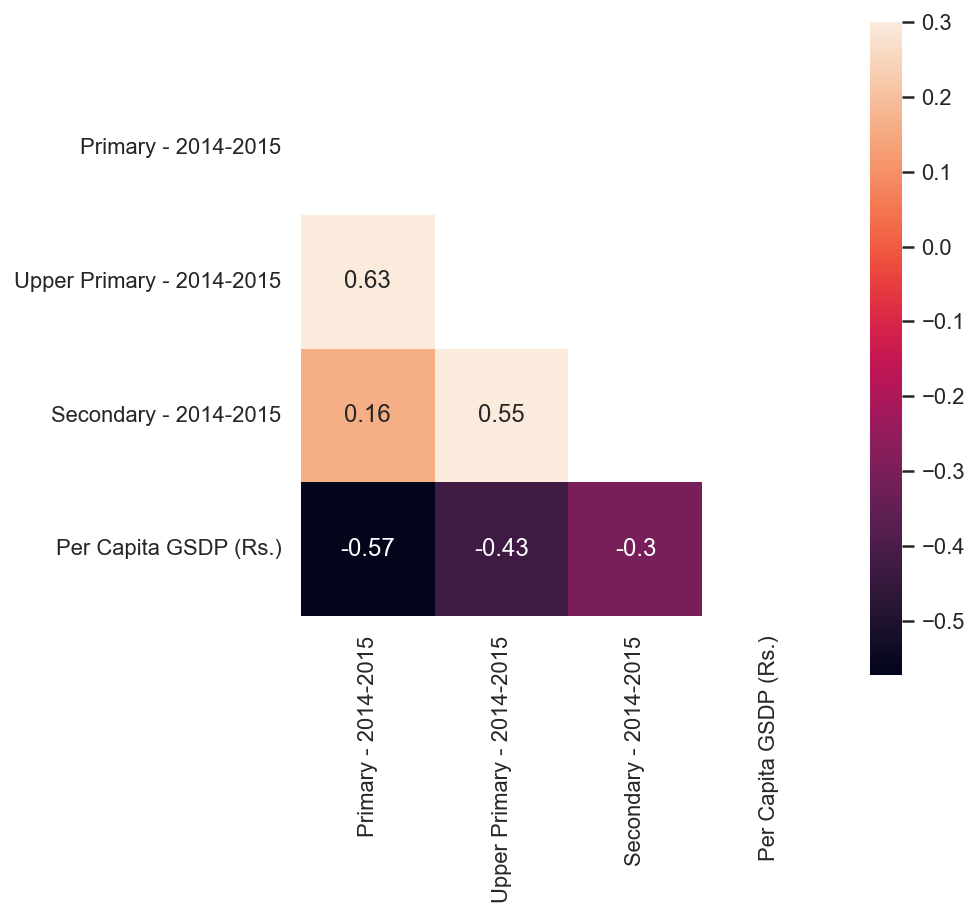

In [84]:

gdp_droput_df = state_dropout_df.copy()
# drop unnecessary columns from dataframe
gdp_droput_df = gdp_droput_df[['Primary - 2014-2015',
                              'Upper Primary - 2014-2015','Secondary - 2014-2015','Per Capita GSDP (Rs.)']]
numeric_cols = [col for col in gdp_droput_df]
gdp_droput_df[numeric_cols] = gdp_droput_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(6,6))
mask = np.zeros_like(gdp_droput_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(gdp_droput_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');

# Observations and Recommendations from above plot

There is negative correlation of dropout percentage with per Capita GSDP (Rs.)

In other words increase in dropout rate results in decrease in GDP per capita

Upper Primary droput rate percentage is most negative correlated (-0.5) with GDP per Capita

Government must take some measures to control Upper Primary dropout rate so that with decrease in droput rate, GDP per Capita should increase

# Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP

In [85]:
def sector_dropout_heatmap(sector_droput_df,education_levels):
    sns.set(font_scale=1)
    nrows = int(np.ceil(len(education_levels))) # Makes sure you have enough rows
    #tweak figsize scaler if graphs don't fit well
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(5,5*len(education_levels)), sharex=False, sharey=False)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, edu_level in enumerate(education_levels):
        plt.subplots_adjust(hspace = 1.2)
        # drop unnecessary columns from dataframe
        subset_df = sector_droput_df.copy()
        subset_df = subset_df[['Primary_Perc','Secondary_Perc','Tertiary_Perc',edu_level]]
        numeric_cols = [col for col in subset_df]
        subset_df[numeric_cols] = subset_df[numeric_cols].apply(
            pd.to_numeric, errors='coerce', axis=1)

        mask = np.zeros_like(subset_df.corr())
        mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
              sns.heatmap(round(subset_df.corr(),2),mask=mask,vmax=.3, square=True, annot=True,
                         ax=ax[i]);#cmap='RdYlGn');
        ax[i].set_title("Correlation of {0} dropout rate with Sectors".format(edu_level),color='blue')

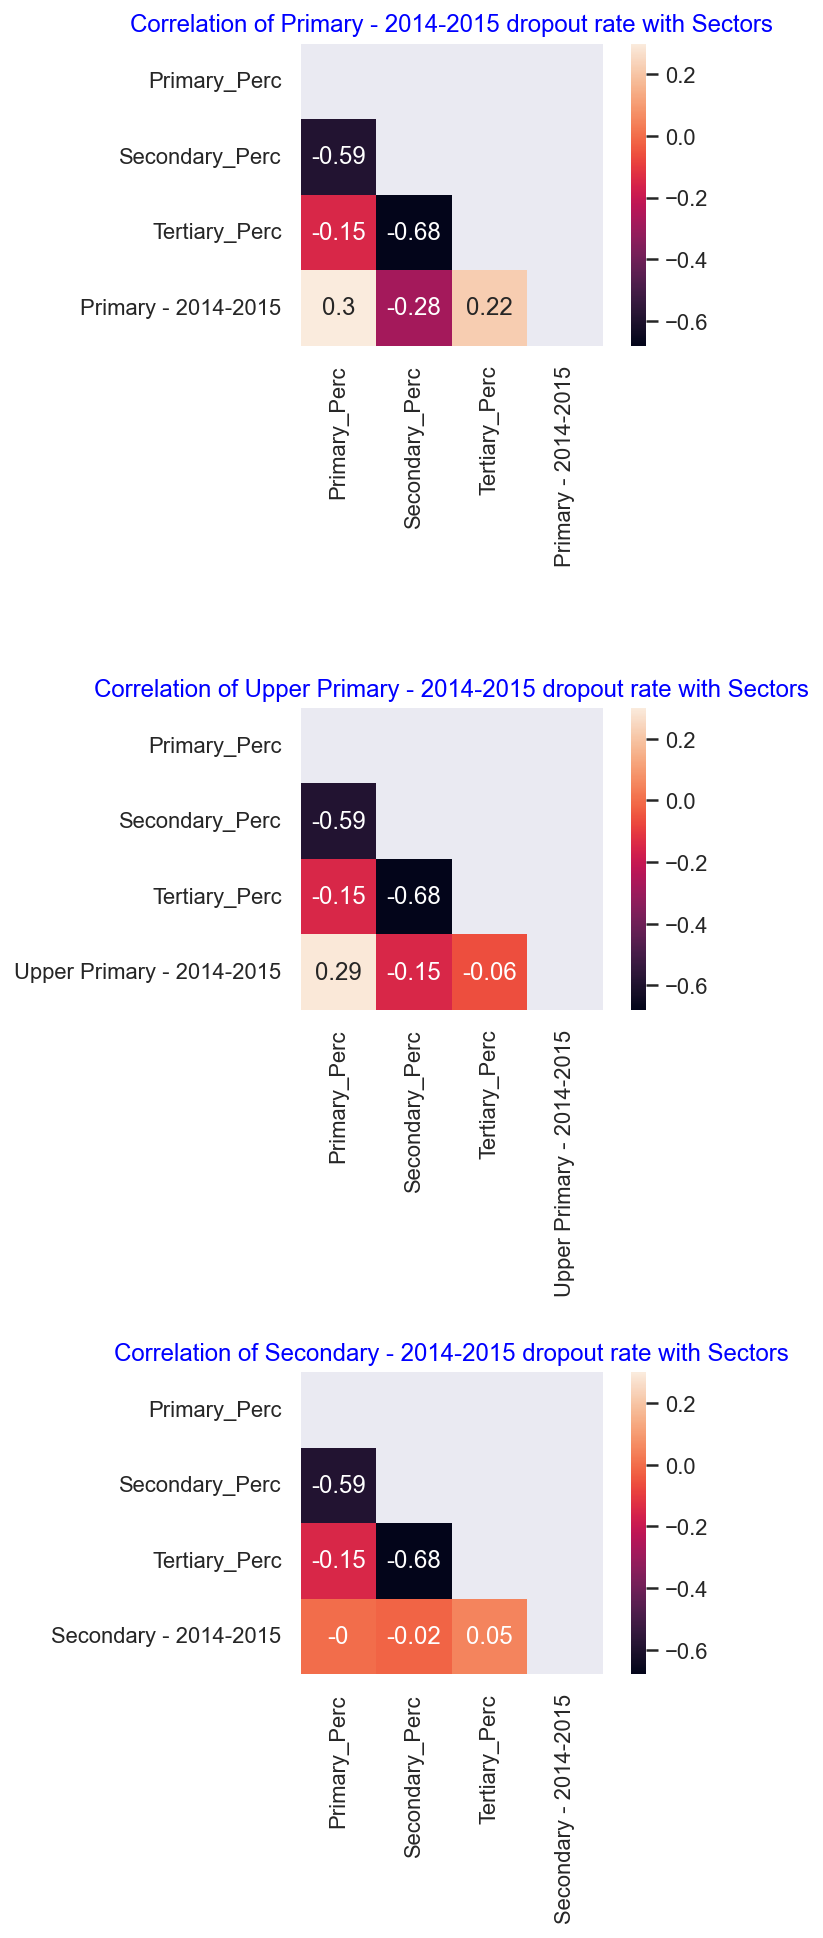

In [86]:
education_levels = ['Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015']
sector_dropout_heatmap(state_dropout_df,education_levels)

# Observations from above plot


Dropout rate of Primary education level is negative correlated(-0.26) with Secondary Sector %contribution. GDP of such states will decrease given the skilled and educated labor required for secondary sector is not easily available and thus doesn’t encourage industries to be setup. However there is positive correlation (0.27) with Primary Sector %contribution. Given primary sectors rely on unskilled labor, a drop in primary schools creates a large labor pool helping primary sector and thus contribution to GDP growth.


Dropout rate of Upper Primary education level is negative correlated(-0.35) with Secondary Sector %contribution. There is also a small negative correlation(-0.01) with Tertiary Sector %Contribution. This means with increase in dropout rate in Upper Primary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation (0.45) with Primary Sector %contribution as per reason explained above.


Dropout rate of Upper Secondary education level is negative correlated(-0.25) with Secondary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Secondary Sectors will get affected. GDP of such states will decrease. However there is positive correlation (0.28) with Primary Sector %contribution. This means with increase in dropout rate in Secondary education level, States with major contribution from Primary Sectors will see increase in GDP

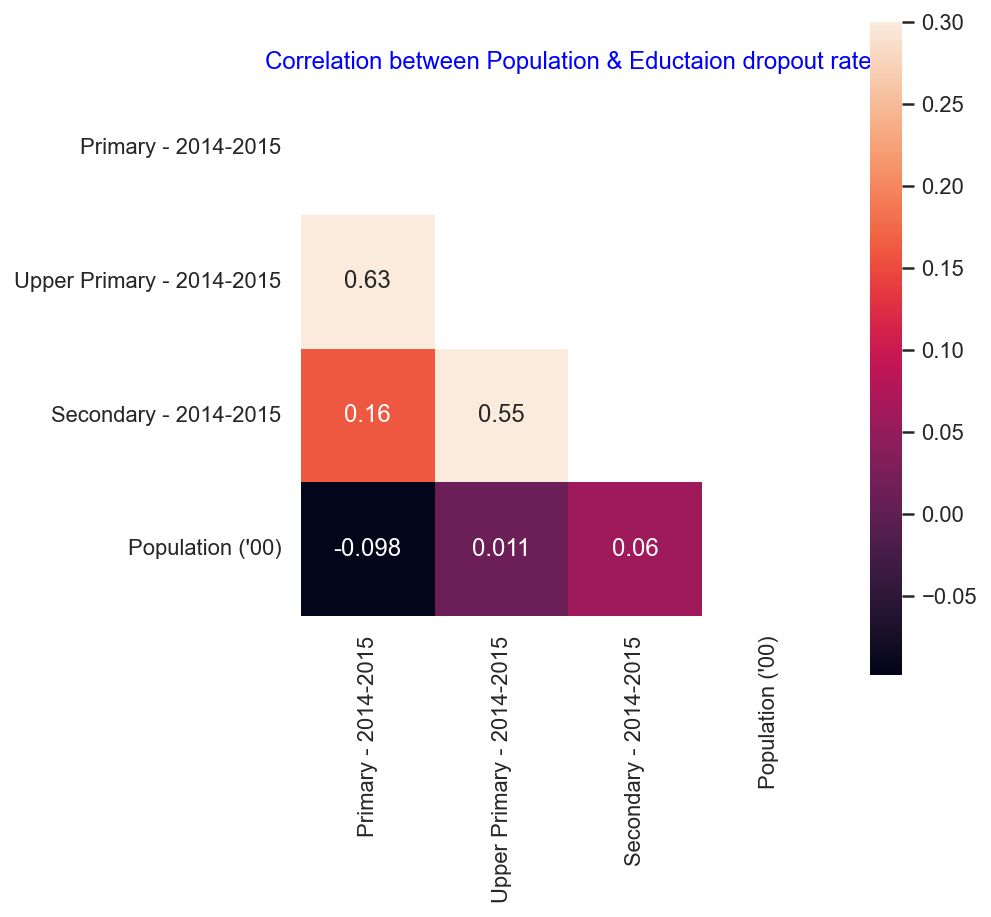

In [87]:
gdp_droput_df = state_dropout_df.copy()
# drop unnecessary columns from dataframe
gdp_droput_df = gdp_droput_df[['Primary - 2014-2015',
                              'Upper Primary - 2014-2015','Secondary - 2014-2015',"Population ('00)",]]
numeric_cols = [col for col in gdp_droput_df]
gdp_droput_df[numeric_cols] = gdp_droput_df[numeric_cols].apply(pd.to_numeric, errors='coerce', axis=1)
#states_cat_df.info()

plt.figure(figsize=(6,6))
mask = np.zeros_like(gdp_droput_df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
      sns.heatmap(gdp_droput_df.corr(),mask=mask,vmax=.3, square=True, annot=True,
                 );#cmap='RdYlGn');
plt.title("Correlation between Population & Eductaion dropout rate",color='blue');

# Observations from above plot

Increase in population results in decrease (-0.23) in Primary dropout rate

Increase in population results in increase (0.17) in Secondary dropout rate

Increase in population results in small increase (0.041) in Upper Primary dropout rate

# Hypothesis from above data of dropout rate and Sector's %contribution and population


Increase in dropout rate negatively affects Secondary sector and thereby GDP of states with major %contribution from secondary sector

If the population increases, Secondary dropout rate also increases

Per Capita decreases with increase in dropout rate

Government must bring in measures to control dropout rate which will help in increase in GDP of states